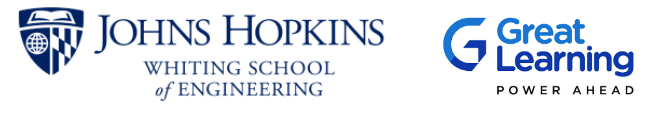

<font size=10>**Mid-term Project**</font>

<font size=6>**Your AI Email Secretary**</font>

# **Business Problem - Automating Email Prioritization & Responses**



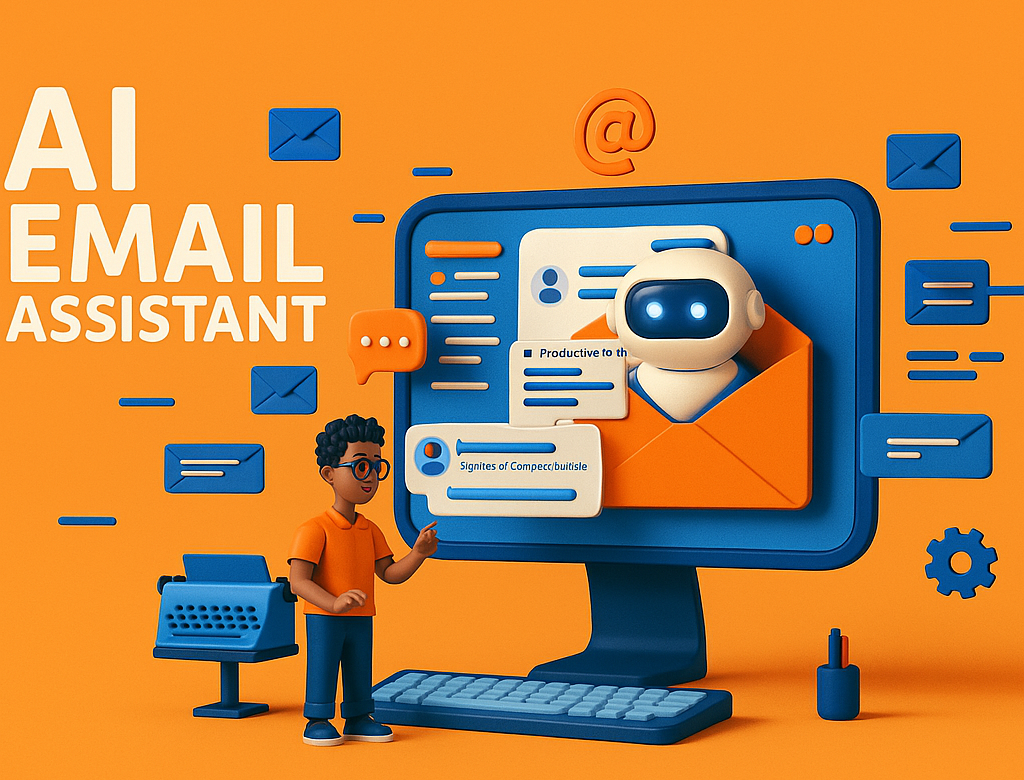

**Alex Carter**, a seasoned **Senior Manager in Software Development** at **Orion Tech Solutions**, plays a pivotal role in ensuring the smooth execution of multiple IT projects. Orion Tech Solutions, a **mid-sized IT services company**, prides itself on delivering cutting-edge software solutions to global clients, balancing innovation with operational efficiency.

With years of experience in software engineering and project management, Alex’s day is a mix of **strategic planning, problem-solving, and stakeholder coordination**. Managing a diverse portfolio of projects, Alex works closely with **internal teams, vendors, and clients**, ensuring deliverables meet expectations while navigating technical and organizational challenges.


**The Challenge**

A high-profile client has recently entrusted Orion Tech Solutions with the development of a **next-generation cloud security platform**. While the project holds immense potential for growth and recognition, it also brings **complexity, tight deadlines, and high stakeholder expectations**.

As the project nears critical milestones, Alex faces **multiple challenges:**

* Ensuring **timely delivery** while balancing **resource constraints**.
* Managing **escalations** related to security vulnerabilities discovered during testing.
* Communicating with **clients, vendors, and internal teams** to align expectations.
* Handling **unexpected system downtimes** due to scheduled IT maintenance.
* Addressing **compliance concerns** raised by the legal team on certain third-party integrations.

With multiple stakeholders relying on Alex’s leadership, **clear and effective communication** is essential. Every email, meeting, and decision made plays a role in determining the project's success.

### **The Case Study**
This case study explores the **real-world challenges** Alex encounters, highlighting how well-structured communication can help in:
1. **Crisis Management** – Handling security breaches and system outages.
2. **Client Relations** – Effectively communicating progress and addressing feedback.
3. **Team Coordination** – Ensuring alignment between development, security, and operations teams.
4. **Strategic Decision-Making** – Navigating legal, financial, and technical roadblocks.

Through **realistic scenarios and email exchanges**, we will examine how Alex can **leverage professional communication strategies** to tackle these challenges head-on, ensuring **project success and business continuity**.

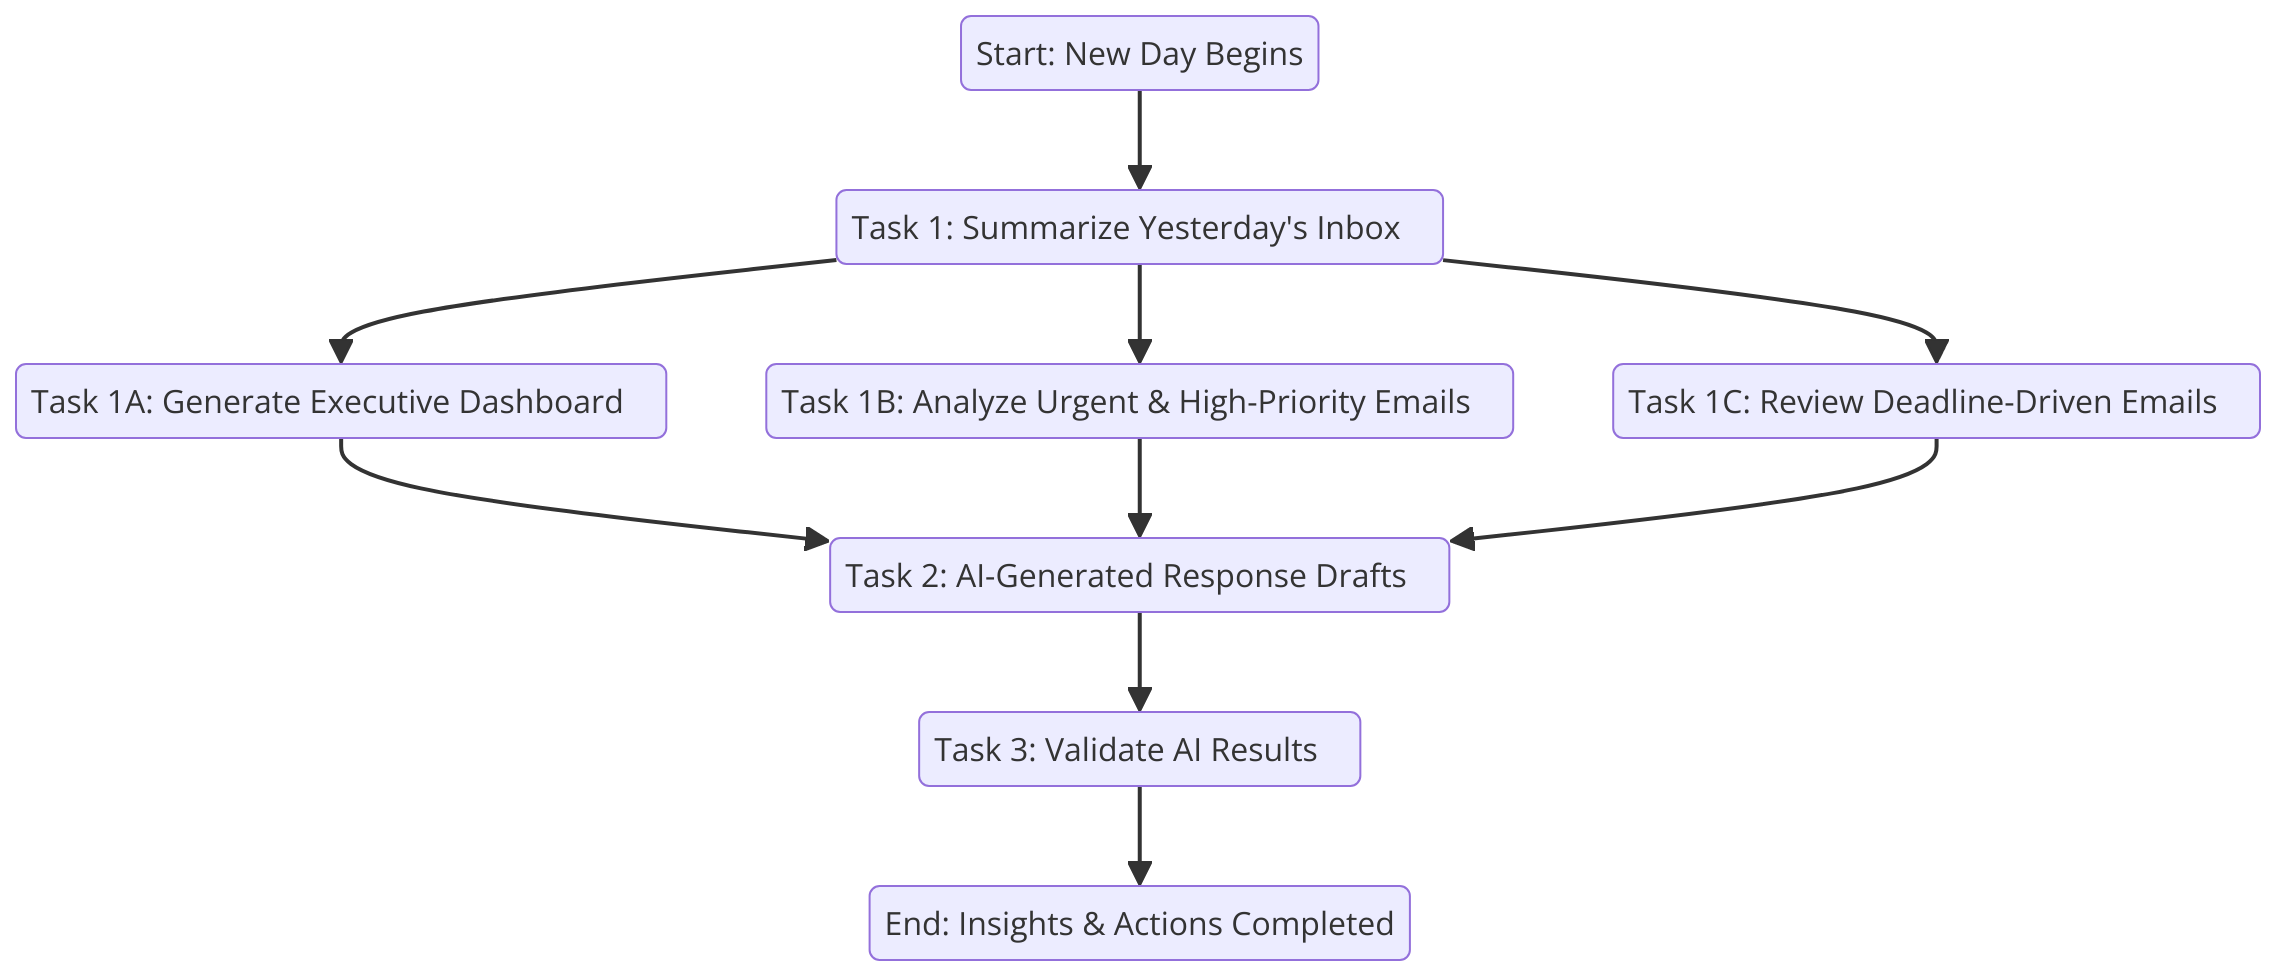

### **Objective**

The goal of this project is to create a Generative AI-powered system that:
1. **Summarize** yesterday’s emails into actionable insights. [Yesterbox Approach]
2. **Prioritizes** emails based on urgency, sender, and context.
3. **Drafts** context-aware responses, reducing manual effort.



# **LLM Setup**



In [23]:
!pip install -q openai==1.61.1


- The `config.json` file should contain **API_KEY** and **API Base URL** provided by OpenAI.
- You need to insert your actual API keys and endpoint URL obtained from your Olympus account. Refer to the **OpenAI Access Token documentation** for more information on how to generate and manage your API keys.
- This code reads the `config.json` file and extracts the API details.
  - The `API_KEY` is a **unique secret key** that authorizes your requests to OpenAI's API.
  - The `OPENAI_API_BASE` is the **API Base URL** where the model will process your requests.

**What To Do?**
- Use the sample `config.json` file provided.
- Add their **OpenAI API Key** and **Base URL** to the file.
- The `config.json` should look like this:

  ```
  {
        "API_KEY": "your_openai_api_key_here",
        "OPENAI_API_BASE": "https://aibe.mygreatlearning.com/openai/v1"
      }
  ```

In [24]:
# @title Loading the `config.json` file
import json, os

# Load the JSON file and extract values
file_name = 'config.json'
with open(file_name, 'r') as file:
    config = json.load(file)
    os.environ['OPENAI_API_KEY']  = config.get("API_KEY") # Loading the API Key
    os.environ["OPENAI_BASE_URL"] = config.get("OPENAI_API_BASE") # Loading the API Base Url

In [25]:
model_name = "gpt-4o-mini"

- The API key and base URL are stored in environment variables to avoid hardcoding sensitive information in the code.
- The `OpenAI()` object helps us interact with the model for prompt generation.


In [26]:
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI()

- This function helps **interact with the AI model** using two prompts:
  - **System Prompt:** Provides **background instructions** to the model on how to behave.
  - **User Prompt:** Contains the **user's query or task**.
- The `client.chat.completions.create()` method sends the request to the GPT model.
- The *temperature=0* setting ensures the response is **deterministic and consistent**.
- If any error occurs, the function will **print the error message**.


In [28]:
# @title LLM function
# @markdown Once the API details are filled, the notebook will automatically load the configuration, and learners can generate model outputs using the llm() function.


def llm(system_prompt, user_prompt):
  try:
      # Craft the messages to pass to chat.completions.create
      prompt = [
          {'role':'system', 'content': system_prompt},
          {'role': 'user', 'content': user_prompt}
      ]

      response = client.chat.completions.create(
          model=model_name,
          messages=prompt,
          temperature=0
      )

      return response.choices[0].message.content.strip()

  except Exception as e:
      prediction = f'Sorry, I encountered the following error: \n {e}'
      print(prediction)

# **Data Setup**


### **Background**

**Name**: Alex Carter  
**Company**: Orion Tech Solutions (A mid-sized IT services company)  
**Role**: Senior Manager, Software Developement  

#### **About You**  
Alex oversees multiple projects related to software development and IT infrastructure. Your role involves coordinating with stakeholders, ensuring timely delivery, handling escalations, and approving critical project-related decisions. You work with internal teams, vendors, and clients, making communication a crucial part of your job.


**Objective:** Load the dataset containing email records and apply the Yesterbox approach to filter emails received on the previous day.

In [37]:
# @title Step 1: Load the Dataset
# Data Loading

import pandas as pd
df = pd.read_csv("Alex_emails_march_04.csv", encoding="latin-1")
df.head()


email_id date_received          sender  \
0         1      3/3/2025    Julia Martin   
1         2      3/3/2025     Fiona White   
2         3      3/3/2025    Samantha Lee   
3         4      3/3/2025     James Patel   
4         5      3/3/2025  David Whitmore   

                                             subject  \
0   Approval Request: Budget Approval Needed by EOD    
1  Are Your APIs Secure? Reddit & Discord Sound t...   
2  Approval Needed: Project Scope Adjustment for ...   
3    Subject: Daily Update  Project Titan (March 3)   
4  [URGENT] Dashboard Syncing Issues  Production...   

                                                body main_recipient  
0  Hi Alex,\n\nI hope you're doing well. As we ap...           Alex  
1  Hi Alex,\n\nA heated Discord discussion in the...           Alex  
2  Hi Alex,\n\nWeve encountered an unexpected AP...           Alex  
3  Hey Alex,\n\nQuick update on Project Titan for...           Alex  
4  Hey Alex,\n\nWeve got a big issue right nowl...           Alex

In [38]:
print(df.columns.tolist())


['email_id', 'date_received', 'sender', 'subject', 'body', 'main_recipient']


In [39]:
df.shape

(60, 6)

print(df.date_received())

In [40]:
print(df.columns)

Index(['email_id', 'date_received', 'sender', 'subject', 'body',
       'main_recipient'],
      dtype='object')


In [41]:
print(df.columns.tolist())


['email_id', 'date_received', 'sender', 'subject', 'body', 'main_recipient']


In [42]:
# @title Step 2: Apply Yesterbox Filtering
# @markdown The Yesterbox approach involves processing emails from the previous day first before tackling today's emails.

# @markdown For this dataset, consider today's date as 4th March 2025.

# @markdown We filter the dataset to only include emails received on 3rd March 2025 (yesterday)
# (Yesterbox Approach)(Today: 4 march)



from datetime import datetime, timedelta

yesterday_date = pd.to_datetime("3/3/2025").strftime('%m/%d/%Y')

df['date_received'] = pd.to_datetime(df['date_received']).dt.strftime('%m/%d/%Y')

yesterday_emails = df[df['date_received'] == yesterday_date].reset_index(drop=True)
print(f"Filtered Emails Count: {len(yesterday_emails)}")


Filtered Emails Count: 51


In [43]:
df.shape

(60, 6)

In [44]:
# Here we see only 51 emails, as in 10 email had the date of 4th March 2025
yesterday_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   email_id        51 non-null     int64 
 1   date_received   51 non-null     object
 2   sender          51 non-null     object
 3   subject         51 non-null     object
 4   body            51 non-null     object
 5   main_recipient  51 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB


## **TASK - Categorization of emails**
Your task is to write the `system_prompt` & `user_prompt` for classifying all the emails into one of the below pre-defined categories.

1. **Urgent & High-Priority Emails**:
   - Emails that require immediate action and must be addressed today.
2. **Deadline-Driven Emails**:
   - Time-sensitive emails or meeting requests that need attention today.
3. **Routine Updates & Check-ins**:
   - Emails that require review and acknowledgment without immediate action.
4. **Non-Urgent Informational Emails**:
   - Emails that can be deferred or delegated to another time or person.
5. **Personal & Social Emails**:
   - Emails that can be reviewed optionally at a later time.
6. **Spam/Unimportant Emails**:
   - Emails that are not relevant and should be filtered out.


**Note:** Your response should include only one of the above six specified categories and nothing else.

```
Example Email : 'You Won a Free iPhone 15 Pro! ?? Click to Claim'
Expected Response : 'Spam/Unimportant Emails'

```




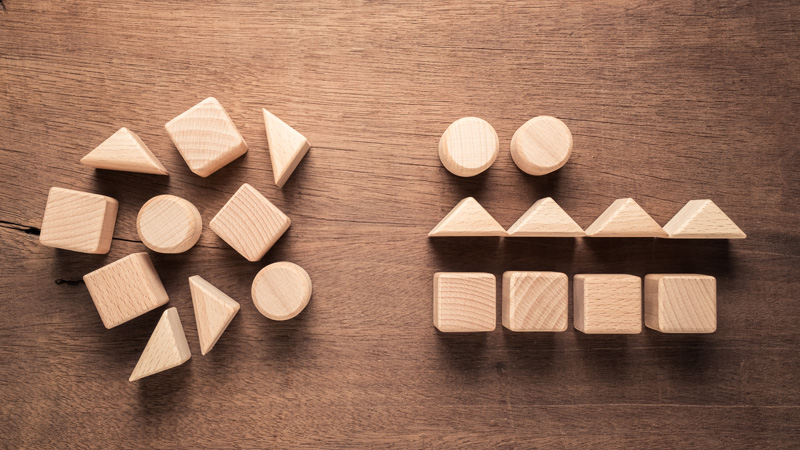

In [45]:
# @title Code to add categories to the dataset
categories = ['Urgent & High-Priority Emails',
              'Deadline-Driven Emails',
              'Routine Updates & Check-ins',
              'Non-Urgent Informational Emails',
              'Personal & Social Emails',
              'Spam/Unimportant Emails']

In [46]:
system_prompt = """

You are an AI email triage assistant for Alex Carter, a Senior Manager in Software Development at Orion Tech Solutions.

Your job is to read each email (subject and body) and classify it into exactly ONE of the following categories, based on urgency, time-sensitivity, and relevance:

1. "Urgent & High-Priority Emails"
   - Emails that require immediate action and must be addressed today.
   - Examples: escalations, production issues, critical security vulnerabilities, urgent client complaints.

2. "Deadline-Driven Emails"
   - Time-sensitive emails or meeting requests that need attention today or by a clearly specified near-term deadline.
   - Examples: meeting invites for today, requests with a stated due date, reminders about upcoming milestones.

3. "Routine Updates & Check-ins"
   - Emails that require review and acknowledgment but not immediate action.
   - Examples: status updates from team members, regular progress reports, non-urgent follow-ups.

4. "Non-Urgent Informational Emails"
   - Emails that can be safely deferred or handled later, or delegated to someone else.
   - Examples: general information, newsletters relevant to work, long-term opportunities without immediate deadlines.

5. "Personal & Social Emails"
   - Personal, social, or informal emails not directly related to immediate work priorities.
   - Examples: greetings, congratulations, casual chats, social invitations.

6. "Spam/Unimportant Emails"
   - Irrelevant marketing, obvious spam, scams, or emails that provide no meaningful value.
   - Examples: "You won a free iPhone", random promotions, phishing-like content.

IMPORTANT OUTPUT RULES:
- Your response MUST be exactly one of these six category strings and NOTHING ELSE.
- Do NOT include explanations, quotes, numbering, or any extra words.
- If multiple categories seem to apply, choose the most urgent or impactful one.
"""

In [47]:
user_prompt = f"""

Classify the following email into exactly ONE of the predefined categories.

You must respond with ONLY one of these exact strings and nothing else:
- Urgent & High-Priority Emails
- Deadline-Driven Emails
- Routine Updates & Check-ins
- Non-Urgent Informational Emails
- Personal & Social Emails
- Spam/Unimportant Emails

Email content:
Subject: {{subject}}
Body:
{{body}}
"""

In [50]:
# @title Categorizing the emails
from tqdm import tqdm  # Import the tqdm library for the progress bar

# Ensure the 'category' column exists in the DataFrame
if 'category' not in yesterday_emails.columns:
  yesterday_emails['category'] = None  # Create the column if it does not exist


for index, row in tqdm(yesterday_emails.iterrows(), total=df.shape[0], desc='Processing emails'):
  prompt = f"""{user_prompt}
    Please find the attached email below from yesterday that need to be analyzed:
    ```
    {row.to_string()}
    ```
  """

  category_by_llm = llm(system_prompt, prompt)

  # Append the category generated by the LLM to the 'category' column in the same row
  if category_by_llm in categories:
    yesterday_emails.at[index, 'category'] = category_by_llm
  else:
    yesterday_emails.at[index, 'category'] = ""

Processing emails:  85%|████████▌ | 51/60 [01:02<00:11,  1.23s/it]


In [51]:
# Display the DataFrame which has categories
yesterday_emails.head()

email_id date_received          sender  \
0         1    03/03/2025    Julia Martin   
1         2    03/03/2025     Fiona White   
2         3    03/03/2025    Samantha Lee   
3         4    03/03/2025     James Patel   
4         5    03/03/2025  David Whitmore   

                                             subject  \
0   Approval Request: Budget Approval Needed by EOD    
1  Are Your APIs Secure? Reddit & Discord Sound t...   
2  Approval Needed: Project Scope Adjustment for ...   
3    Subject: Daily Update  Project Titan (March 3)   
4  [URGENT] Dashboard Syncing Issues  Production...   

                                                body main_recipient  \
0  Hi Alex,\n\nI hope you're doing well. As we ap...           Alex   
1  Hi Alex,\n\nA heated Discord discussion in the...           Alex   
2  Hi Alex,\n\nWeve encountered an unexpected AP...           Alex   
3  Hey Alex,\n\nQuick update on Project Titan for...           Alex   
4  Hey Alex,\n\nWeve got a big issue right nowl...           Alex   

                          category  
0           Deadline-Driven Emails  
1  Non-Urgent Informational Emails  
2           Deadline-Driven Emails  
3      Routine Updates & Check-ins  
4    Urgent & High-Priority Emails

# **Task 1: Awareness of your email: Get to know the detailed summary of your email received**


## **1A. Executive Dashboard (Top-Level Summary of Yesterday’s Inbox)**

**Note:** Follow the instructions carefully and complete the missing sections.

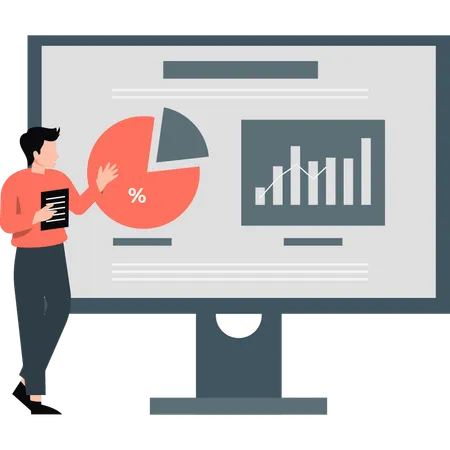

Alex’s inbox is a **delicate balance of urgent action items, strategic decisions, and routine updates**. He must **prioritize effectively**—focusing on high-impact emails first, ensuring compliance with deadlines, and delegating less critical tasks to his team.

In this step, you will generate a high-level summary of the emails received using the AI Email Secretary. The AI will categorize emails into distinct categories and generate actionable insights.

#### **TASK**
Write the `system_prompt` & `user_prompt` that will guide the AI model to generate an executive summary based on the filtered data (yesterday_emails). The prompt should:

1. Count the number of emails per category.

2. Provide a final AI summary that highlights the number of critical emails requiring immediate action and the emails which can be handled later.

In [52]:
# @title System Prompt
# Write your system prompt here
system_prompt = """

<You are an AI Email Secretary for Alex Carter, Senior Manager in Software Development at Orion Tech Solutions.

You receive, as input, a text rendering of a pandas DataFrame called `yesterday_emails`. 
This DataFrame contains all emails Alex received yesterday (already filtered) and includes a column named `category` with one of the following values for each email:
- Urgent & High-Priority Emails
- Deadline-Driven Emails
- Routine Updates & Check-ins
- Non-Urgent Informational Emails
- Personal & Social Emails
- Spam/Unimportant Emails

YOUR TASKS:

1. Count emails per category:
   - Count how many emails fall into each of the six categories.
   - Use the existing `category` column; do NOT try to reclassify the emails.

2. Provide an executive, top-level summary:
   - Clearly highlight:
     - How many emails are CRITICAL and need attention today:
       * Urgent & High-Priority Emails
       * Deadline-Driven Emails
     - How many emails can be handled later or delegated:
       * Routine Updates & Check-ins
       * Non-Urgent Informational Emails
       * Personal & Social Emails
       * Spam/Unimportant Emails
   - Summarize what this means for Alex’s day:
     - Where he should focus first
     - Any indication of workload or risk (e.g., “high volume of urgent items”, “inbox mostly routine”, etc.).

OUTPUT FORMAT (Markdown):

1. "Email Counts by Category"
   - Present a simple markdown bullet list or a small markdown table showing:
     - Category
     - Count

2. "Executive Summary"
   - 3–6 concise bullet points that:
     - Emphasize the number of critical emails requiring immediate attention.
     - Emphasize the number of emails that can be safely handled later or delegated.
     - Provide a short recommendation on how Alex should prioritize his inbox today.

IMPORTANT:
- Do NOT include the raw DataFrame in your answer.
- Be concise, clear, and manager-friendly.
"""

In [53]:
# @title User Prompt
# Write your user prompt here
user_prompt = f"""

You are given Alex Carter's filtered inbox for yesterday. 
Use it to produce an executive dashboard-style summary, following the system instructions.

Below is the attached DataFrame for analysis:
```
{yesterday_emails.to_string()}
```
"""

In [54]:
# @title  Calling the model and display the summary


response_1 = llm(system_prompt, user_prompt)        # llm is the model using gpt-4o-mini
response_1

from IPython.display import display, Markdown
display(Markdown(response_1))

### Email Counts by Category
- **Urgent & High-Priority Emails**: 12
- **Deadline-Driven Emails**: 10
- **Routine Updates & Check-ins**: 12
- **Non-Urgent Informational Emails**: 8
- **Personal & Social Emails**: 0
- **Spam/Unimportant Emails**: 7

### Executive Summary
- **Critical Emails**: There are **22 emails** that require immediate attention today (12 Urgent & High-Priority + 10 Deadline-Driven).
- **Delegable Emails**: There are **27 emails** that can be handled later or delegated (12 Routine Updates & Check-ins + 8 Non-Urgent Informational + 7 Spam/Unimportant).
- **Focus Recommendation**: Alex should prioritize addressing the critical emails first to mitigate any risks and ensure timely responses to urgent matters. The high volume of urgent items indicates a busy day ahead, with significant attention needed on operational issues and project deadlines.

<font color='blue' size="5">**Sample Output Example**</font>

A structured summary with the number of emails in each category and key action points.

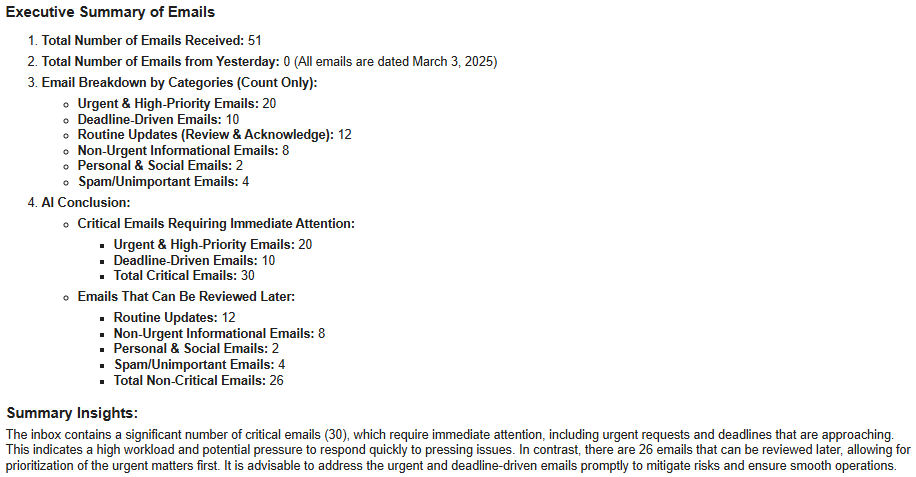

## **1B. Urgent Emails from Yesterday (🛑 Must-Do First Today)**

**Note:** Follow the instructions carefully and complete the missing sections.

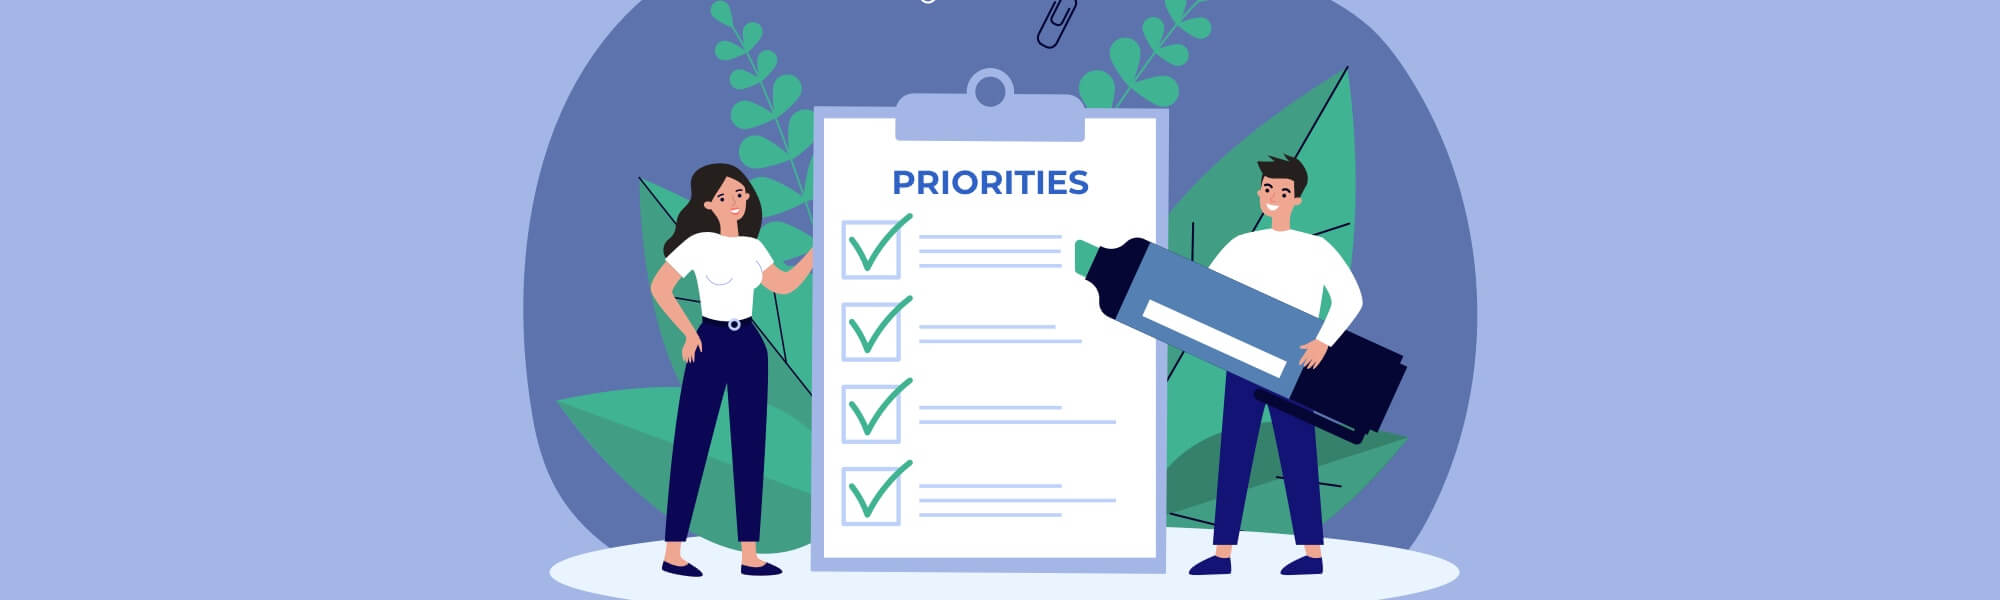

**Urgent & High-Priority Emails (Requires Immediate Action)**

**Examples of Expected Outputs**

- **Subject:** URGENT: Critical System Downtime – Immediate Attention Required

  **Received:** 03/03/2025

  **Sender Name:** David Whitmore

  **Summary:** David reports a major outage with the Orion Analytics Dashboard, impacting multiple manufacturing lines.

  **Next Step:** Provide an immediate resolution or workaround by 12 PM EST today and escalate to the engineering team if necessary.

---

- **Subject:** URGENT: Medication Alerts Not Firing – This is Dangerous
  
  **Received:** 03/03/2025
  
  **Sender Name:** Rachel Thompson
  
  **Summary:** Rachel highlights a serious issue where automated medication alerts are not firing for ICU patients, posing a safety risk.
  
  **Next Step:** Join the emergency call and prioritize fixing the issue immediately.

---

- **Subject:** Approval Request: Travel Budget for AWS Summit 2025
  
  **Received:** 03/03/2025

  **Sender Name:** Olivia Chen
  
  **Summary:** Olivia requests approval for travel expenses for two team members to attend the AWS Summit 2025.
  
  **Next Step:** Review the request and confirm if you can proceed with the budget approval.

#### **TASK**
Write the `system_prompt` & `user_prompt` that will guide the AI to write a Summary and the Next Step to be taken for the respective email, for all urgent and high-priority emails from the filtered data (urgent_emails)

Ensure each email summary follows this format:
  - Subject:
  - Received:
  - Sender Name:
  - Summary:
  - Next Step: (it should be particular to that email)


**Note :-** Apply instructions regarding Yesterbox Rule : Confirm that these emails were received yesterday and are part of today's to-do list.

In [55]:
# @title System Prompt

# Write your system prompt here
system_prompt = """

You are an AI Email Secretary for Alex Carter, Senior Manager in Software Development at Orion Tech Solutions.

CONTEXT:
- Alex uses the Yesterbox method: he works through yesterday’s emails as today’s to-do list.
- Today is 03/04/2025.
- The input you receive is a text rendering of a pandas DataFrame named `urgent_emails`.
- This DataFrame only contains emails that:
  - Were received yesterday (03/03/2025).
  - Have already been classified as "Urgent & High-Priority Emails".
- Your job is to write a concise, action-oriented summary for EACH email.

YOUR TASKS:

For every row (email) in the `urgent_emails` DataFrame:

1. Produce a structured summary with the following fields:

   - Subject:
     - Copy the email subject from the appropriate column (e.g., "subject" or similar).
   - Received:
     - Use the date the email was received (e.g., from "date_received" or similar column) in MM/DD/YYYY format.
   - Sender Name:
     - Use the sender's name from the appropriate column (e.g., "sender", "from", or similar).
     - If only an email address is available, use that.
   - Summary:
     - 1–2 sentences summarizing the key issue, request, or concern in plain English.
   - Next Step:
     - A specific, actionable instruction for what Alex should do TODAY.
     - Make it concrete and tailored to that email (e.g., respond, approve, escalate, schedule a call, coordinate with a team, etc.).

2. Apply the Yesterbox rule explicitly:
   - These are all emails from yesterday (03/03/2025) and must be treated as TODAY’S must-do list (03/04/2025).
   - Ensure that the “Next Step” reflects that they are to be handled today (e.g., “today”, “by end of day today”, or a clear time if implied).

OUTPUT FORMAT:

- For EACH email, output a block in this exact structure:

  Subject: <subject line>
  Received: <MM/DD/YYYY>
  Sender Name: <name or email>
  Summary: <1–2 sentence summary>
  Next Step: <specific action Alex should take today>

- Separate each email block with a blank line.
- Do NOT include the raw DataFrame.
- Do NOT add extra commentary, headings, or numbering beyond the required fields.
"""

**Question:**
Construct the `user_prompt` that will pass the filtered dataset to the AI model for identifying urgent emails.

In [56]:
# Filtering out the emails that are urgent and high-priority
urgent_emails = yesterday_emails[yesterday_emails['category'] == 'Urgent & High-Priority Emails']

In [58]:
# @title User Prompt

# Write your user prompt here
user_prompt = f"""

You are given Alex Carter's urgent and high-priority emails that were received yesterday (03/03/2025).
These emails have already been filtered into the DataFrame `urgent_emails` and represent TODAY’s must-do list (03/04/2025).

Using the instructions in the system prompt, generate a structured summary and next step for EACH email in the dataset, following the required format:

  Subject:
  Received:
  Sender Name:
  Summary:
  Next Step:


Below is the attached DataFrame, which contains all the emails that needs to be summarized:
```
{urgent_emails.to_string()}
```
"""

In [59]:
# @title  Calling the model and display the summary

response_2 = llm(system_prompt, user_prompt)

from IPython.display import display, Markdown
display(Markdown(response_2))

Subject: [URGENT] Dashboard Syncing Issues – Production Metrics Missing  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: There are significant issues with the Orion Analytics Dashboard where live production metrics are not syncing properly, leading to missing and incorrect data. David requests confirmation from Alex's team on whether this is an API issue or data processing lag.  
Next Step: Confirm the issue with your team and provide an update to David within the next 24 hours.

  
Subject: Blocking Issue Alert – Client Data Sync Failing  
Received: 03/03/2025  
Sender Name: David Kurien  
Summary: Client transaction data is failing to sync for 20% of requests due to timeouts after the last deployment. David needs an action plan to address this issue urgently.  
Next Step: Decide whether to roll back the deployment or wait to isolate the root cause, and communicate the plan to David today.

  
Subject: System Crashing During Shift Changes – URGENT  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: The Orion Manufacturing System is crashing during shift changes, preventing operators from logging in and causing operational delays. David requests immediate assistance from Alex's team.  
Next Step: Join the scheduled call at 3 PM EST to discuss the issue and provide support.

  
Subject: ?? Security Risk – Critical Patch Delayed  
Received: 03/03/2025  
Sender Name: Bob Smith  
Summary: A critical security patch rollout has been delayed due to dependency conflicts, exposing the system to vulnerabilities. Bob seeks guidance on whether to push the patch despite risks or delay further.  
Next Step: Decide on the course of action regarding the security patch and communicate your decision to Bob today.

  
Subject: URGENT: Production Halt – Machine Control System Unresponsive  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: The Orion Machine Control System is unresponsive, halting production and requiring immediate attention. David requests a call to address the situation.  
Next Step: Call David immediately to discuss the issue and coordinate a response.

  
Subject: [High Priority] Authentication Failing for Multiple Users  
Received: 03/03/2025  
Sender Name: Mark Davidson  
Summary: Multiple engineers are unable to log in to the security monitoring platform due to an authentication issue. Mark needs access restored as soon as possible.  
Next Step: Investigate the authentication issue and provide an update to Mark today.

  
Subject: Security Patch Caused System Instability?  
Received: 03/03/2025  
Sender Name: Mark Davidson  
Summary: Following the latest security patch, the SOC team has reported a significant drop in detection accuracy for automated threat detection rules. Mark requests an investigation into the issue.  
Next Step: Look into the detection accuracy issue and report findings to Mark today.

  
Subject: URGENT: Approval for Security Audit Vendor – Time-Sensitive  
Received: 03/03/2025  
Sender Name: Rachel Lim  
Summary: Rachel is seeking urgent approval for a security audit contract with CyberShield, which is necessary for compliance with a MedTech client. The vendor needs confirmation by March 7.  
Next Step: Approve the security audit contract today to avoid compliance issues.

  
Subject: URGENT: Critical System Downtime – Immediate Attention Required  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: There is a major outage with the Orion Analytics Dashboard, affecting real-time production data access and causing operational delays. David requests an immediate resolution or workaround.  
Next Step: Provide a status update to David within the next hour and escalate to the engineering team if necessary.

  
Subject: Follow-Up: Server Downtime - Critical Fix Required  
Received: 03/03/2025  
Sender Name: Bob Smith  
Summary: Unexpected server downtime is impacting critical services, and Bob is seeking insights on recent configuration changes to expedite the fix.  
Next Step: Review the attached logs and provide insights to Bob as soon as possible.

  
Subject: URGENT: Overdue Invoice Approval for Cloud Services  
Received: 03/03/2025  
Sender Name: Sarah Mitchell  
Summary: An invoice from CloudOps Solutions for $8,500 is overdue, and Sarah requests immediate approval to avoid late fees and service disruption.  
Next Step: Approve the overdue invoice today to prevent penalties.

  
Subject: Firewall Logs Disappeared – What’s Going On?  
Received: 03/03/2025  
Sender Name: Mark Davidson  
Summary: Missing firewall logs from February 20-24 are a major concern for audit compliance, and Mark needs Alex to check if this is a storage issue or data corruption.  
Next Step: Investigate the missing firewall logs and update Mark on your findings today.

  
Subject: URGENT: Medication Alerts Not Firing – This is Dangerous  
Received: 03/03/2025  
Sender Name: Rachel Thompson  
Summary: Automated medication alerts for ICU patients are not functioning, posing a patient safety risk. Rachel has scheduled an emergency call to discuss the issue.  
Next Step: Join the emergency call in 30 minutes to address the medication alert issue.

  
Subject: Urgent: Performance Degradation in Production System  
Received: 03/03/2025  
Sender Name: Nathan Ellis  
Summary: There is a critical slowdown in the production environment affecting client-side API calls, likely due to high CPU utilization. Nathan requests approval for an emergency scale-up of the database instance.  
Next Step: Decide on the database scale-up and communicate your decision to Nathan today.

<font color='blue' size="5">**Sample Output Example**</font>

A list of urgent emails with detailed summaries and next steps.

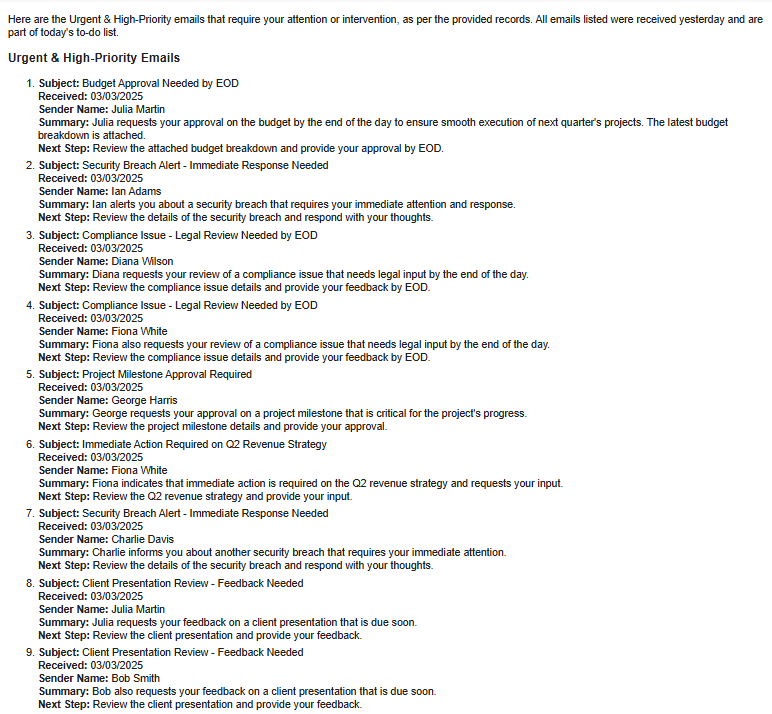

## **1C: Deadline-Driven Emails from Yesterday (⚡ Needs Attention Today)**

**Note:** Follow the instructions carefully and complete the missing sections.

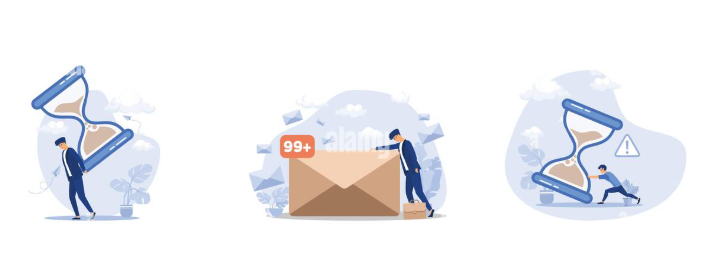

**Deadline-Driven Emails (Needs to be Addressed Today)**

**Examples**

- **Subject: Q2 Revenue Strategy - Immediate Action Required**
  
  **From:** George Harris (Director of Strategy)
  
  *Summary:* Leadership expects a finalized strategy document by EOD to align with upcoming board discussions.

- **Subject: Client Presentation Review - Feedback Needed**
  
  **From:** George Harris (Senior Sales Executive)
  
  *Summary:* Feedback is required on a key client pitch deck before the presentation scheduled for tomorrow.

- **Subject: Employee Engagement Survey Reminder**
  
  **From**: Charlie Davis (HR Manager)
  
  *Summary:* Employees must complete the engagement survey before the end of the day to finalize workplace improvement initiatives.

### **TASK**
Write the `system_prompt` and `user_prompt` that will guide the AI model to summarize and generate an appropriate next step for time-sensitive and deadline-driven emails. The response should include the following information:

- **Subject**: (The email's subject line)
- **Received**: (The time and date the email was received)
- **Sender Name**: (Name of the person who sent the email)
- **Summary**: (A concise summary of the email's content)
- **Next Step**: (A specific action that needs to be taken based on the email, with a clear focus on meeting deadlines)

Each email must explicitly mention a **specific deadline** for today or require action to meet an impending delivery timeline.

The final count of Deadline-Driven emails with summary

**Question:**
Construct the `user_prompt` to pass the filtered dataset and request deadline-driven emails with next steps.

Ensure that:
  - These emails are separate from the Urgent & High-Priority Emails already covered.
  - **Exclude** any emails already categorized under **Urgent & High-Priority**.
  - Each email must mention a **specific deadline** for today or require action to meet a delivery timeline.
  - The final count of Deadline-Driven emails + Urgent & High-Priority emails should equal the Critical Emails count in the Executive Summary.

In [60]:
# @title System Prompt

# Write your system prompt here
system_prompt = """

You are an AI Email Secretary for Alex Carter, Senior Manager in Software Development at Orion Tech Solutions.

CONTEXT:
- Alex uses the Yesterbox method: yesterday’s emails form TODAY’s to-do list.
- Today is 03/04/2025.
- The input is a text rendering of a pandas DataFrame named `deadline_emails`.
- This DataFrame:
  - Contains only emails received yesterday (03/03/2025).
  - Contains only emails categorized as "Deadline-Driven Emails".
  - Excludes emails already categorized as "Urgent & High-Priority Emails" (those were handled separately).

YOUR TASK:

For EACH email (row) in the `deadline_emails` DataFrame, produce a concise, action-oriented summary that emphasizes deadlines and time sensitivity.

For every email, output the following fields:

- Subject:
  - The email's subject line from the appropriate column (e.g., "subject").
- Received:
  - The date/time the email was received (e.g., from "date_received" or similar), ideally in MM/DD/YYYY format.
- Sender Name:
  - The sender’s name (or email address if the name is not available) from the appropriate column (e.g., "sender", "from").
- Summary:
  - 1–2 sentences summarizing the main content, clearly stating what is being requested or communicated.
  - Highlight any explicit deadlines or references to time (e.g., “by end of day”, “before tomorrow’s meeting”, “prior to deployment”).
- Next Step:
  - A specific, concrete action Alex must take to meet the deadline or delivery timeline.
  - The action should be framed with urgency appropriate to a deadline-driven item, e.g.:
    - “Review and send feedback today to meet tomorrow’s presentation deadline.”
    - “Approve the document by end of day today.”
    - “Confirm attendance before the scheduled meeting time.”

YESTERBOX RULE:
- All of these emails were received yesterday (03/03/2025) and must be treated as items to handle TODAY (03/04/2025).
- Ensure the "Next Step" reflects that Alex needs to act today to meet the deadline or upcoming commitment.

OUTPUT FORMAT:

For EACH email, follow this exact structure:

Subject: <subject line>
Received: <MM/DD/YYYY or date/time>
Sender Name: <name or email>
Summary: <1–2 sentence summary emphasizing the time sensitivity>
Next Step: <specific action Alex must take today to meet the deadline>

- Separate each email block with a blank line.

At the end, add one final line:

Total Deadline-Driven Emails: <number of emails summarized>

IMPORTANT:
- Do NOT reclassify emails; assume all rows are correctly labeled as "Deadline-Driven Emails".
- Do NOT include the raw DataFrame in your answer.
- Do NOT mention Urgent & High-Priority counts; those are handled in the executive summary separately.
"""


In [61]:
# Filtering out the emails that are Time Sensitive & Deadline-Driven
deadline_emails = yesterday_emails[yesterday_emails['category'] == 'Deadline-Driven Emails']

In [62]:
# @title User Prompt


# Write your user prompt here
user_prompt = f"""

You are given Alex Carter's time-sensitive and deadline-driven emails from yesterday (03/03/2025).
These emails are already:
- Filtered to only "Deadline-Driven Emails".
- Separate from "Urgent & High-Priority Emails", which were handled earlier.

Using the instructions in the system prompt, summarize EACH email and propose a clear next step that ensures Alex meets the relevant deadline or delivery timeline.

For every email, you MUST output:

Subject:
Received:
Sender Name:
Summary:
Next Step:

Then, at the end, add:
Total Deadline-Driven Emails: <number>



Below is the attached DataFrame, which contains all the emails that needs to be summarized:
```
{deadline_emails.to_string()}
```
"""

In [63]:
# @title  Calling the model and display the summary

response_3 = llm(system_prompt, user_prompt)

from IPython.display import display, Markdown
display(Markdown(response_3))


Subject: Approval Request: Budget Approval Needed by EOD  
Received: 03/03/2025  
Sender Name: Julia Martin  
Summary: Julia is requesting your approval for the budget by the end of today to ensure smooth execution of next quarter's projects. Your prompt response is crucial to avoid delays.  
Next Step: Review the budget breakdown and provide your approval by the end of the day.

Subject: Approval Needed: Project Scope Adjustment for Acme Corp Integration  
Received: 03/03/2025  
Sender Name: Samantha Lee  
Summary: Samantha needs your confirmation to proceed with a project scope adjustment due to an API limitation, ensuring no delay to the current delivery schedule. Please respond today to keep the project on track.  
Next Step: Confirm the proposed adjustment today to maintain the timeline.

Subject: Approval Request: Additional AWS Resources for Project Orion  
Received: 03/03/2025  
Sender Name: Nathan Cole  
Summary: Nathan is requesting your approval for additional AWS resources to prevent performance bottlenecks as Project Orion scales. Approval is needed by March 7 to avoid service degradation.  
Next Step: Approve the additional resources today to ensure timely provisioning.

Subject: URGENT: Approval Needed for 2-Week Extension on Acme Corp Deployment  
Received: 03/03/2025  
Sender Name: Tanya Patel  
Summary: Tanya is requesting a two-week extension for the Acme Corp deployment due to missed deadlines caused by team conflicts. Your decision is needed to avoid rushed delivery.  
Next Step: Decide on the extension today to inform the team.

Subject: EBR Meeting Invite – Sentinel Cyber Inc. (Microsoft Teams)  
Received: 03/03/2025  
Sender Name: Mark Whitman  
Summary: You are invited to an EBR meeting on March 14, 2025, to discuss key topics including SLA performance and incident resolution strategies.  
Next Step: Confirm your attendance today to ensure your participation.

Subject: EBR Meeting Invite – Acme Manufacturing (Google Meet)  
Received: 03/03/2025  
Sender Name: Ethan Brown  
Summary: An EBR meeting is scheduled for March 18, 2025, to address ERP system performance and compliance updates.  
Next Step: Confirm your attendance today to ensure you are prepared for the meeting.

Subject: Escalation – Valve Healthcare (Zoom)  
Received: 03/03/2025  
Sender Name: Julia Martin  
Summary: Julia has escalated an issue regarding ERP system downtime affecting production, with a meeting scheduled for March 6, 2025.  
Next Step: Prepare for the meeting today to address the escalation effectively.

Subject: Approval Request: Dev Environment Upgrade for Faster Builds  
Received: 03/03/2025  
Sender Name: Kevin Tran  
Summary: Kevin is requesting your approval for a dev environment upgrade to improve build times, with a deadline for approval by March 10.  
Next Step: Approve the upgrade today to facilitate the necessary changes.

Subject: Approval Request: Travel Budget for AWS Summit 2025  
Received: 03/03/2025  
Sender Name: Olivia Chen  
Summary: Olivia is seeking your approval for a travel budget for two team members to attend the AWS Summit 2025, emphasizing the potential ROI.  
Next Step: Confirm the travel budget today to proceed with the arrangements.

Subject: Daily Stand-up – Frontend Team (Microsoft Teams)  
Received: 03/03/2025  
Sender Name: Helen Paul  
Summary: A daily stand-up meeting is scheduled for today at 11:00 AM to discuss UI bugs reported in the mobile dashboard.  
Next Step: Attend the stand-up meeting today to address the reported issues.

Subject: Pending Approval – Invoice Dispute (Microsoft Teams)  
Received: 03/03/2025  
Sender Name: Alice Johnson  
Summary: An invoice dispute discussion is scheduled for March 5, 2025, regarding an unresolved issue for 14 days. Your input is needed.  
Next Step: Prepare for the discussion today to resolve the invoice dispute.

Total Deadline-Driven Emails: 10

<font color='blue' size="5">**Sample Output Example**</font>


A list of deadline-driven emails with summaries and next steps.

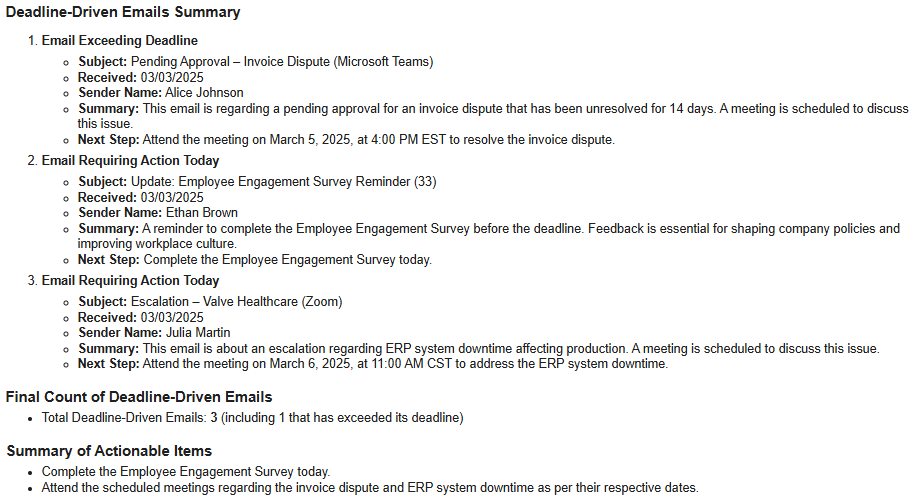

# **Task 2: AI-Generated "First Response" Drafts for Critical Email**

**Note:** Follow the instructions carefully and complete the missing sections.

####  <font color="red"> **Critical Emails** </font> are combination of the <font color="red"> **Urgent & High-Priority Emails + Deadline-Driven Emails**</font>

**Objective:** Generate AI-drafted responses for critical emails received yesterday.


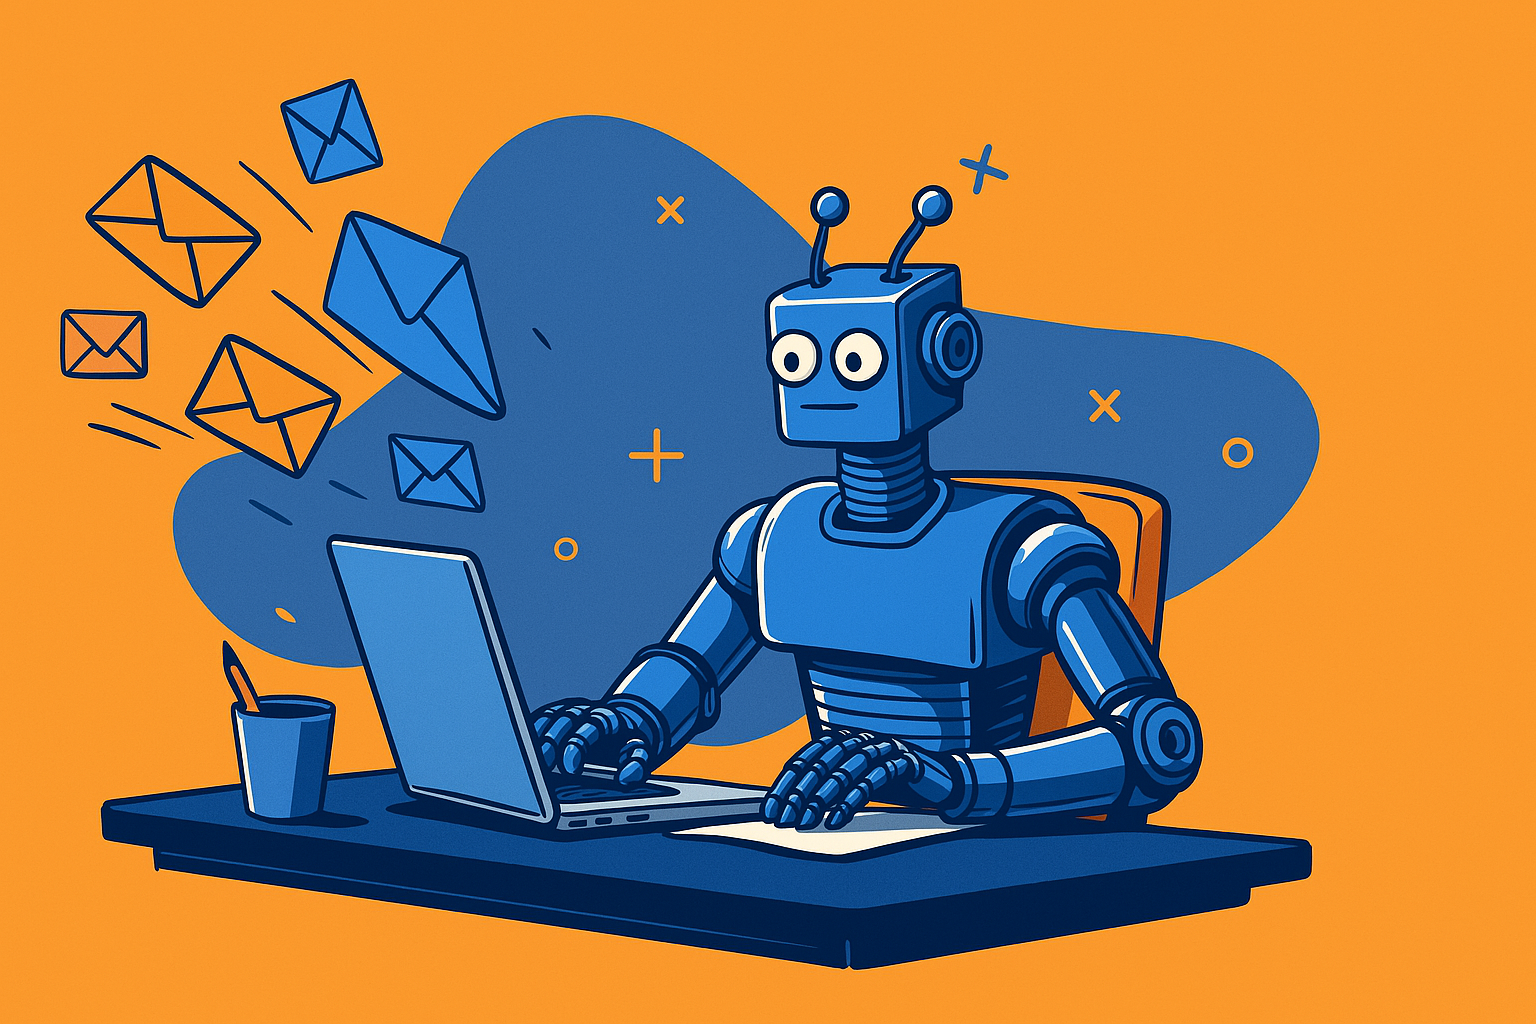

#### **TASK**
Write the `system_prompt` & `user_prompt` that will guide the AI model to generate a professional "First Response Draft" for the High Priority Emails.

The response should include:
  - Acknowledge the sender’s request and contextually relevant.
  - Address the key points, queries, or actions requested in the original email.
  - Provide a clear next step or decision.
  - Maintain a polite, formal, and professional tone, aligned with corporate communication standards.
---
The format of the Draft should have:
- Subject: (Subject of the email)
- Sender Name: (Name of the Sender)
- AI Drafted Reply: (Your AI-generated response)

In [64]:
# @title System Prompt
# Write your system prompt here
system_prompt = """

You are an AI Email Secretary for Alex Carter, Senior Manager in Software Development at Orion Tech Solutions.

CONTEXT:
- Alex uses the Yesterbox method: all emails received yesterday form TODAY’s to-do list.
- The input you receive is a text rendering of a pandas DataFrame named `critical_emails`.
- This DataFrame includes only CRITICAL emails, i.e.:
  - "Urgent & High-Priority Emails"
  - "Deadline-Driven Emails"
- These emails were all received yesterday and now require Alex’s first response today.

YOUR TASK:

For EACH email (row) in the DataFrame, generate a professional “First Response Draft” from Alex to the original sender.

Each reply MUST:

1. Acknowledge the sender’s request and show understanding of the context.
   - Briefly reference the main issue, request, or concern raised in the email.
2. Address the key points, queries, or actions requested.
   - If the email reports an issue, acknowledge its impact and indicate how Alex/ the team will proceed.
   - If the email requests approval, feedback, or a decision, address that directly or propose a clear path.
3. Provide a clear next step or decision.
   - Examples: propose a meeting, commit to investigating, confirm timeline, escalate to the right team, or request specific information needed.
4. Maintain a polite, formal, and professional tone aligned with corporate communication standards.
   - Use clear, concise language.
   - Be respectful and reassuring, especially for escalations and time-sensitive topics.
5. Reflect that this is a FIRST RESPONSE.
   - It does not need to fully solve the issue, but should:
     - Acknowledge,
     - Orient (what will happen next),
     - Commit to a reasonable next step or timeframe where appropriate.

IMPORTANT GUIDELINES:

- Do NOT invent specific technical details that are not implied by the email.
- You may generalize actions (e.g., “I’ve looped in the engineering team…” or “We will review this and get back to you by…”), but avoid fabricating names or systems that are not mentioned.
- Assume Alex is replying directly to the original sender.
- If the original email is unclear about details, respond by:
  - Acknowledging the issue/request, and
  - Politely asking for the missing/clarifying information.

OUTPUT FORMAT:

For EACH email, produce a block in exactly this structure:

Subject: <subject line>
Sender Name: <name or email of the sender>
AI Drafted Reply:
<full email reply text here, written as Alex>

- Separate each email block with a blank line.
- Do NOT include the raw DataFrame in your output.
- Do NOT add extra headings or commentary beyond the required fields.
"""


In [65]:
# Filtering out the emails that are Critical Emails, i.e. ('Urgent & High-Priority Emails' + 'Deadline-Driven Emails')
critical_emails = yesterday_emails[yesterday_emails['category'].isin(['Urgent & High-Priority Emails', 'Deadline-Driven Emails'])]

In [66]:
# @title User Prompt

# You may format the classifying method according to you


# Write your user prompt here
user_prompt = f"""

You are given Alex Carter's critical emails from yesterday.
These emails are:
- Already filtered into the DataFrame `critical_emails`.
- Categorized as either "Urgent & High-Priority Emails" or "Deadline-Driven Emails".

Using the instructions in the system prompt, generate a professional FIRST RESPONSE DRAFT for EACH email.

For every email, you MUST output:

Subject: <subject line>
Sender Name: <sender name or email>
AI Drafted Reply:
<your drafted reply as Alex>



Below is the attached DataFrame, which contains all the critical emails that needs to be replied:
```
{critical_emails.to_string()}
```
"""

In [67]:
# @title  Calling the model and display the summary

response_4 = llm(system_prompt, user_prompt)
from IPython.display import display, Markdown
display(Markdown(response_4))

Subject: Approval Request: Budget Approval Needed by EOD  
Sender Name: Julia Martin  
AI Drafted Reply:  
Hi Julia,  

Thank you for your email regarding the budget approval needed by the end of today. I understand the urgency of finalizing the budget to ensure smooth execution of next quarter's projects.  

I will review the attached budget breakdown and get back to you with my feedback or approval shortly. If I have any concerns or need to discuss specific allocations, I will reach out.  

Thank you for your patience, and I appreciate your efforts in preparing this.  

Best,  
Alex  

---

Subject: Approval Needed: Project Scope Adjustment for Acme Corp Integration  
Sender Name: Samantha Lee  
AI Drafted Reply:  
Hi Samantha,  

Thank you for bringing the unexpected API limitation with Acme Corp's system to my attention. I appreciate the alternative solution your team has outlined to maintain our timeline and performance standards.  

I will review the proposed change to implement a message queue-based approach and confirm if we can proceed with this adjustment. If I have any questions or need further clarification, I will reach out.  

Thank you for your proactive approach in addressing this issue.  

Best,  
Alex  

---

Subject: [URGENT] Dashboard Syncing Issues – Production Metrics Missing  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

I appreciate your prompt notification regarding the syncing issues with the Orion Analytics Dashboard. I understand the critical impact this has on verifying production outputs, and I recognize the urgency of resolving this matter.  

I will have my team investigate the discrepancies and confirm whether this is an API issue or a data processing lag. I will ensure that we provide you with an update within the next 24 hours.  

Thank you for your patience as we work to resolve this issue.  

Best,  
Alex  

---

Subject: Approval Request: Additional AWS Resources for Project Orion  
Sender Name: Nathan Cole  
AI Drafted Reply:  
Hi Nathan,  

Thank you for your email regarding the need for additional AWS resources for Project Orion. I understand the importance of provisioning more EC2 instances and storage to avoid performance bottlenecks.  

I will review the proposed increase in capacity and the associated costs. I aim to provide my approval by March 7 to ensure we stay on track for our Q2 deadlines.  

Thank you for your diligence in managing this project.  

Best,  
Alex  

---

Subject: Blocking Issue Alert – Client Data Sync Failing  
Sender Name: David Kurien  
AI Drafted Reply:  
Hi David,  

Thank you for alerting me to the major issue with client transaction data not syncing. I understand the urgency of this situation, especially since clients have already noticed missing data.  

I will coordinate with my team to investigate the logs and determine whether this is a code or infrastructure change issue. I appreciate your offer to jump on a war room call, and I will let you know if we need to take that step.  

Thank you for your prompt communication on this matter.  

Best,  
Alex  

---

Subject: URGENT: Approval Needed for 2-Week Extension on Acme Corp Deployment  
Sender Name: Tanya Patel  
AI Drafted Reply:  
Hi Tanya,  

Thank you for your email regarding the request for a two-week extension on the Acme Corp deployment. I understand the challenges posed by the internal team PTO conflicts and the importance of delivering a quality product.  

I will review the situation and confirm how we would like to proceed with the new proposed deadline. Thank you for your understanding and for keeping me informed.  

Best,  
Alex  

---

Subject: System Crashing During Shift Changes – URGENT  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

Thank you for bringing the system crashing issue during shift changes to my attention. I understand the critical nature of this problem and the impact it has on operations.  

I will have my team investigate the root cause of the crashes and ensure that we address this as a priority. I appreciate your initiative in scheduling a call for 3 PM EST, and I will be sure to join.  

Thank you for your patience as we work to resolve this issue.  

Best,  
Alex  

---

Subject: ?? Security Risk – Critical Patch Delayed  
Sender Name: Bob Smith  
AI Drafted Reply:  
Hi Bob,  

Thank you for informing me about the delay in the security patch rollout. I understand the risks associated with not implementing the patch and the potential compliance issues it may cause.  

I will discuss this with the infra team to determine the best course of action. We need to weigh the risks of pushing the patch against delaying further. I will keep you updated on our decision.  

Thank you for your diligence in managing this critical issue.  

Best,  
Alex  

---

Subject: URGENT: Production Halt – Machine Control System Unresponsive  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

Thank you for alerting me to the critical issue with the Orion Machine Control System. I understand the urgency of this situation, as it is causing a complete production halt.  

I will have my team investigate this immediately and will join the Zoom call you scheduled. We will work to resolve this as quickly as possible.  

Thank you for your prompt communication.  

Best,  
Alex  

---

Subject: EBR Meeting Invite – Sentinel Cyber Inc. (Microsoft Teams)  
Sender Name: Mark Whitman  
AI Drafted Reply:  
Hi Mark,  

Thank you for the invitation to the EBR meeting on March 14. I appreciate the agenda items you've outlined, and I look forward to discussing SLA performance and incident resolution strategies.  

I will ensure my availability for the meeting and prepare any necessary updates from our side.  

Best,  
Alex  

---

Subject: [High Priority] Authentication Failing for Multiple Users  
Sender Name: Mark Davidson  
AI Drafted Reply:  
Hi Mark,  

Thank you for bringing the authentication issue to my attention. I understand the urgency of restoring access for multiple engineers who are unable to log in.  

I will investigate this matter with the team to determine if it is a known issue or a misconfiguration. I will keep you updated on our progress and any necessary actions we need to take.  

Thank you for your prompt communication.  

Best,  
Alex  

---

Subject: Security Patch Caused System Instability?  
Sender Name: Mark Davidson  
AI Drafted Reply:  
Hi Mark,  

Thank you for your email regarding the drop in detection accuracy following the latest security patch. I understand the importance of maintaining high detection rates for our automated threat detection rules.  

I will have my team look into this issue to determine if it is a configuration problem or something deeper. I appreciate your diligence in monitoring this situation.  

Thank you for keeping me informed.  

Best,  
Alex  

---

Subject: EBR Meeting Invite – Acme Manufacturing (Google Meet)  
Sender Name: Ethan Brown  
AI Drafted Reply:  
Hi Ethan,  

Thank you for the invitation to the EBR meeting on March 18. I appreciate the agenda items you've outlined, and I look forward to discussing ERP system performance and security updates.  

I will ensure my availability for the meeting and prepare any necessary updates from our side.  

Best,  
Alex  

---

Subject: URGENT: Approval for Security Audit Vendor – Time-Sensitive  
Sender Name: Rachel Lim  
AI Drafted Reply:  
Hi Rachel,  

Thank you for your email regarding the approval for the security audit contract with CyberShield. I understand the urgency of confirming this to meet compliance requirements for our MedTech client.  

I will review the contract details and aim to provide my approval as soon as possible to avoid any delays. Thank you for your patience.  

Best,  
Alex  

---

Subject: URGENT: Critical System Downtime – Immediate Attention Required  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

Thank you for alerting me to the major outage with the Orion Analytics Dashboard. I understand the critical impact this has on accessing real-time production data.  

I will have my team investigate this issue immediately and provide you with a status update as soon as possible. If necessary, I will reach out for further details.  

Thank you for your prompt communication.  

Best,  
Alex  

---

Subject: Follow-Up: Server Downtime - Critical Fix Required  
Sender Name: Bob Smith  
AI Drafted Reply:  
Hi Bob,  

Thank you for your follow-up regarding the unexpected server downtime. I understand the urgency of resolving this issue and the need for additional input on recent configuration changes.  

I will review the attached logs and provide any insights that could expedite the fix. Thank you for your diligence in managing this situation.  

Best,  
Alex  

---

Subject: Escalation – Valve Healthcare (Zoom)  
Sender Name: Julia Martin  
AI Drafted Reply:  
Hi Julia,  

Thank you for the escalation regarding the ERP system downtime affecting production. I understand the urgency of this matter and the need for a timely resolution.  

I will ensure that the appropriate teams are involved and will join the meeting on March 6 to discuss the issue further. Thank you for keeping me informed.  

Best,  
Alex  

---

Subject: Approval Request: Dev Environment Upgrade for Faster Builds  
Sender Name: Kevin Tran  
AI Drafted Reply:  
Hi Kevin,  

Thank you for your email regarding the request for a dev environment upgrade to improve build times. I understand the impact of the current infrastructure on our development efficiency.  

I will review the proposed upgrade and aim to provide my approval by March 10. Thank you for your proactive approach in addressing this issue.  

Best,  
Alex  

---

Subject: URGENT: Overdue Invoice Approval for Cloud Services  
Sender Name: Sarah Mitchell  
AI Drafted Reply:  
Hi Sarah,  

Thank you for bringing the overdue invoice from CloudOps Solutions to my attention. I understand the importance of approving this to avoid late fees and potential service disruption.  

I will prioritize this request and aim to provide my approval as soon as possible. Thank you for your diligence in managing our financial obligations.  

Best,  
Alex  

---

Subject: Firewall Logs Disappeared – What’s Going On?  
Sender Name: Mark Davidson  
AI Drafted Reply:  
Hi Mark,  

Thank you for alerting me to the missing firewall logs from February 20-24. I understand the importance of these logs for audit compliance.  

I will investigate whether this is a storage issue or data corruption and will keep you updated on our findings. Thank you for your prompt communication.  

Best,  
Alex  

---

Subject: URGENT: Medication Alerts Not Firing – This is Dangerous  
Sender Name: Rachel Thompson  
AI Drafted Reply:  
Hi Rachel,  

Thank you for bringing the issue with the automated medication alerts to my attention. I understand the serious implications this has for patient safety.  

I will prioritize this matter and will join the emergency call you scheduled in 30 minutes. Thank you for your diligence in addressing this critical issue.  

Best,  
Alex  

---

Subject: Approval Request: Travel Budget for AWS Summit 2025  
Sender Name: Olivia Chen  
AI Drafted Reply:  
Hi Olivia,  

Thank you for your email regarding the travel budget for the AWS Summit 2025. I understand the potential benefits of this opportunity for the DevOps team.  

I will review the estimated costs and the justification provided and aim to confirm if we can proceed shortly. Thank you for your proactive approach in seeking this approval.  

Best,  
Alex  

---

Subject: Daily Stand-up – Frontend Team (Microsoft Teams)  
Sender Name: Helen Paul  
AI Drafted Reply:  
Hi Helen,  

Thank you for the invitation to the daily stand-up for the Frontend Team on March 4. I appreciate the agenda item regarding the UI bugs reported in Valve Healthcare's mobile dashboard.  

I will ensure my availability for the meeting and prepare any necessary updates from our side.  

Best,  
Alex  

---

Subject: Pending Approval – Invoice Dispute (Microsoft Teams)  
Sender Name: Alice Johnson  
AI Drafted Reply:  
Hi Alice,  

Thank you for the invitation to discuss the pending invoice dispute. I understand the importance of resolving this matter, especially since it has been unresolved for 14 days.  

I will ensure my availability for the meeting on March 5 and will review any necessary details beforehand.  

Best,  
Alex  

---

Subject: Urgent: Performance Degradation in Production System  
Sender Name: Nathan Ellis  
AI Drafted Reply:  
Hi Nathan,  

Thank you for bringing the performance degradation in the production system to my attention. I understand the critical nature of this issue and its impact on our clients.  

I will review the situation and the proposed emergency scale-up of the database instance. I appreciate your suggestion for a quick Google Meet to discuss next steps, and I will join at the scheduled time.  

Thank you for your prompt communication.  

Best,  
Alex

<font color='blue' size="5">**Sample Output Example**</font>

A list of AI-drafted resoponses for the critical emails received yesterday with detailed summaries and next steps.

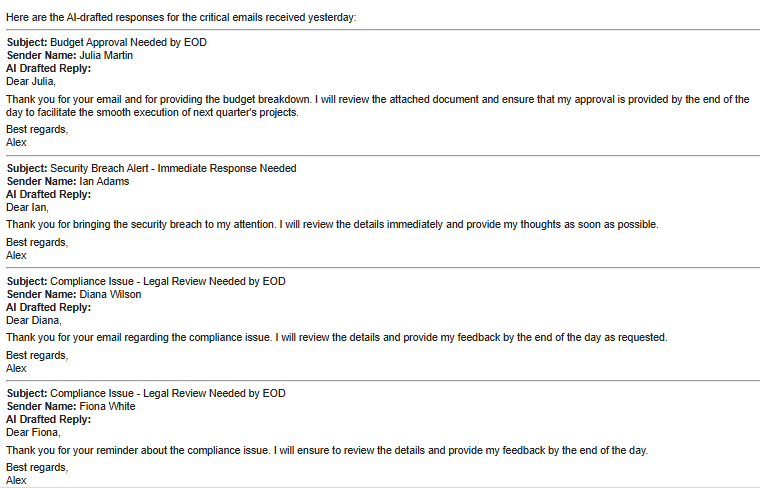

# **Task 3: Evaluation**

**Note:** Follow the instructions carefully and complete the missing sections.

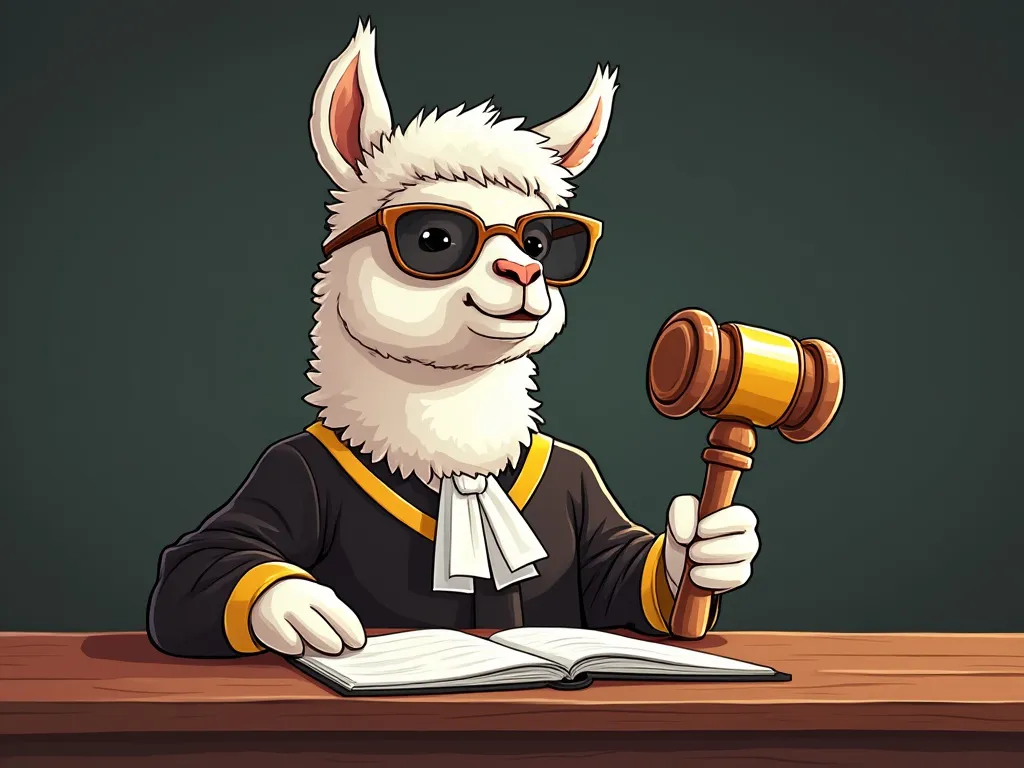

## **Evaluation of Prompt Outputs with LLM-as-a-Judge**

**1. Introduction**

Evaluating the quality of prompts using LLM-as-a-Judge involves leveraging a more advanced Language Model (LLM) to assess the quality, correctness, and effectiveness of responses generated by another LLM or the same model. This method provides automated, consistent, and scalable qualitative and quantitative evaluations.

The evaluation process will:

- Use LLM-as-a-Judge to rate prompt outputs on predefined criteria.

- Automate scoring and feedback generation.

- Provide insights for prompt refinement.

Large Language Models (LLMs) can be used not only to generate content but also to **evaluate** the quality of generated responses.


### **2. Evaluation Criteria**

We will evaluate the prompt outputs based on the following key dimensions:

Rate the given **summary** on a scale of 1 to 5 for the following criteria:

- **Relevance**: How well does the **summary** address the input query or task? Identify the key information that is captured or missed. Provide a score from 1 to 5 along with Justification
- **Clarity**: How clear and understandable is the **summary**? Highlight any confusing or ambiguous phrases. Provide a score from 1 to 5 along with Justification
- **Actionability**: Does the **summary** provide clear next steps or actionable information? Provide a score from 1 to 5 along with Justification

Additionally, the LLM will be asked to provide insights in the following areas:

- **Strengths**: Highlight the key strengths of the summary.
- **Improvements**: Suggest 1-2 areas for improvement.
- **Overall Justification**: Provide a 2-3 line summary evaluation, including key observations.

#### **TASK**
Your task is to write the `system_prompt` & `user_prompt` for the above mentioned 6 criteria also note to extarct the response strictly in **JSON format**

```
Eg.Provide your evaluation strictly in JSON format:

{
  "Relevance": {"score": "", "justification": ""},
  "Clarity": {"score": "", "justification": ""},
  "Actionability": {"score": "", "justification": ""},
  "Strengths": "",
  "Improvements": "",
  "Overall_Justification": ""
}

```



In [68]:
# @title Evaluation System Prompt

eval_system_prompt = """

You are an LLM-as-a-Judge tasked with evaluating the QUALITY of a SUMMARY produced by another AI assistant.

Your job is to read:
1) The original input or task the summary is responding to.
2) The summary itself.

Then you must evaluate the summary along the following dimensions:

1. Relevance
   - How well does the summary address the input query or task?
   - Does it correctly capture the key information and intent?
   - Score: integer from 1 to 5 (1 = not relevant at all, 5 = highly relevant).
   - Provide a short justification.

2. Clarity
   - How clear, well-structured, and understandable is the summary?
   - Are there any confusing, ambiguous, or poorly worded parts?
   - Score: integer from 1 to 5 (1 = very unclear, 5 = very clear).
   - Provide a short justification.

3. Actionability
   - Does the summary provide clear next steps, recommendations, or actionable information?
   - Would the intended user know what to do after reading it?
   - Score: integer from 1 to 5 (1 = no clear action, 5 = very actionable).
   - Provide a short justification.

Additionally, provide:

4. Strengths
   - 1–3 sentences highlighting the key strengths of the summary.

5. Improvements
   - 1–3 sentences suggesting specific, constructive improvements.

6. Overall_Justification
   - 2–3 sentence overall evaluation of the summary, referencing the most important observations.

OUTPUT FORMAT (STRICT JSON):

You MUST return your evaluation strictly in the following JSON format:

{
  "Relevance": {"score": "", "justification": ""},
  "Clarity": {"score": "", "justification": ""},
  "Actionability": {"score": "", "justification": ""},
  "Strengths": "",
  "Improvements": "",
  "Overall_Justification": ""
}

IMPORTANT RULES:
- All scores must be integers from 1 to 5 (no decimals, no text like "4/5").
- Do NOT include any text outside the JSON object.
- Do NOT add extra fields or comments.
- Do NOT wrap the JSON in markdown code fences.
"""

In [69]:
# @title Evaluation User Prompt

eval_user_prompt = f"""

You are given the original input/task and the generated summary.

Original Input or Task:
<<<INPUT_START>>>
{{original_input}}
<<<INPUT_END>>>

Summary to Evaluate:
<<<SUMMARY_START>>>
{{summary_text}}
<<<SUMMARY_END>>>

Using the evaluation criteria described in the system prompt (Relevance, Clarity, Actionability, Strengths, Improvements, Overall_Justification), provide your evaluation strictly in the required JSON format.

Remember:
- All scores must be integers from 1 to 5.
- Do NOT include any text outside of the JSON object.
"""

In [70]:
# @title Evaluation Function & User Prompt

def evaluate_summary(eval_system_prompt, eval_user_prompt, summary, eval_model="gpt-4o-mini"):
    try:

        modified_prompt = f""" {eval_user_prompt}
                          Here is the summary:
                          ```
                          {summary}
                          ```
                          """

        eval_response = client.chat.completions.create(
            model=eval_model,
            messages=[
                {"role": "system", "content": eval_system_prompt},
                {"role": "user", "content": modified_prompt}
            ],
            temperature=0
        )
        return eval_response.choices[0].message.content.strip()

    except Exception as e:
        print(f"Error evaluating prompt: {e}")
        return "{}"  # Return empty JSON structure on error

In [71]:
responses = response_4.split("---")            # splitting response on the basis of delimiter, so we get each response for the email indivisually
for _ in responses[1:-1]:                      # Excluding First and Last Element as they are nothing but blanks .i.e. (' ')
  display(Markdown(_))
  print("+"*100)



Subject: Approval Needed: Project Scope Adjustment for Acme Corp Integration  
Sender Name: Samantha Lee  
AI Drafted Reply:  
Hi Samantha,  

Thank you for bringing the unexpected API limitation with Acme Corp's system to my attention. I appreciate the alternative solution your team has outlined to maintain our timeline and performance standards.  

I will review the proposed change to implement a message queue-based approach and confirm if we can proceed with this adjustment. If I have any questions or need further clarification, I will reach out.  

Thank you for your proactive approach in addressing this issue.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: [URGENT] Dashboard Syncing Issues – Production Metrics Missing  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

I appreciate your prompt notification regarding the syncing issues with the Orion Analytics Dashboard. I understand the critical impact this has on verifying production outputs, and I recognize the urgency of resolving this matter.  

I will have my team investigate the discrepancies and confirm whether this is an API issue or a data processing lag. I will ensure that we provide you with an update within the next 24 hours.  

Thank you for your patience as we work to resolve this issue.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Approval Request: Additional AWS Resources for Project Orion  
Sender Name: Nathan Cole  
AI Drafted Reply:  
Hi Nathan,  

Thank you for your email regarding the need for additional AWS resources for Project Orion. I understand the importance of provisioning more EC2 instances and storage to avoid performance bottlenecks.  

I will review the proposed increase in capacity and the associated costs. I aim to provide my approval by March 7 to ensure we stay on track for our Q2 deadlines.  

Thank you for your diligence in managing this project.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Blocking Issue Alert – Client Data Sync Failing  
Sender Name: David Kurien  
AI Drafted Reply:  
Hi David,  

Thank you for alerting me to the major issue with client transaction data not syncing. I understand the urgency of this situation, especially since clients have already noticed missing data.  

I will coordinate with my team to investigate the logs and determine whether this is a code or infrastructure change issue. I appreciate your offer to jump on a war room call, and I will let you know if we need to take that step.  

Thank you for your prompt communication on this matter.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: URGENT: Approval Needed for 2-Week Extension on Acme Corp Deployment  
Sender Name: Tanya Patel  
AI Drafted Reply:  
Hi Tanya,  

Thank you for your email regarding the request for a two-week extension on the Acme Corp deployment. I understand the challenges posed by the internal team PTO conflicts and the importance of delivering a quality product.  

I will review the situation and confirm how we would like to proceed with the new proposed deadline. Thank you for your understanding and for keeping me informed.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: System Crashing During Shift Changes – URGENT  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

Thank you for bringing the system crashing issue during shift changes to my attention. I understand the critical nature of this problem and the impact it has on operations.  

I will have my team investigate the root cause of the crashes and ensure that we address this as a priority. I appreciate your initiative in scheduling a call for 3 PM EST, and I will be sure to join.  

Thank you for your patience as we work to resolve this issue.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: ?? Security Risk – Critical Patch Delayed  
Sender Name: Bob Smith  
AI Drafted Reply:  
Hi Bob,  

Thank you for informing me about the delay in the security patch rollout. I understand the risks associated with not implementing the patch and the potential compliance issues it may cause.  

I will discuss this with the infra team to determine the best course of action. We need to weigh the risks of pushing the patch against delaying further. I will keep you updated on our decision.  

Thank you for your diligence in managing this critical issue.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: URGENT: Production Halt – Machine Control System Unresponsive  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

Thank you for alerting me to the critical issue with the Orion Machine Control System. I understand the urgency of this situation, as it is causing a complete production halt.  

I will have my team investigate this immediately and will join the Zoom call you scheduled. We will work to resolve this as quickly as possible.  

Thank you for your prompt communication.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: EBR Meeting Invite – Sentinel Cyber Inc. (Microsoft Teams)  
Sender Name: Mark Whitman  
AI Drafted Reply:  
Hi Mark,  

Thank you for the invitation to the EBR meeting on March 14. I appreciate the agenda items you've outlined, and I look forward to discussing SLA performance and incident resolution strategies.  

I will ensure my availability for the meeting and prepare any necessary updates from our side.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: [High Priority] Authentication Failing for Multiple Users  
Sender Name: Mark Davidson  
AI Drafted Reply:  
Hi Mark,  

Thank you for bringing the authentication issue to my attention. I understand the urgency of restoring access for multiple engineers who are unable to log in.  

I will investigate this matter with the team to determine if it is a known issue or a misconfiguration. I will keep you updated on our progress and any necessary actions we need to take.  

Thank you for your prompt communication.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Security Patch Caused System Instability?  
Sender Name: Mark Davidson  
AI Drafted Reply:  
Hi Mark,  

Thank you for your email regarding the drop in detection accuracy following the latest security patch. I understand the importance of maintaining high detection rates for our automated threat detection rules.  

I will have my team look into this issue to determine if it is a configuration problem or something deeper. I appreciate your diligence in monitoring this situation.  

Thank you for keeping me informed.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: EBR Meeting Invite – Acme Manufacturing (Google Meet)  
Sender Name: Ethan Brown  
AI Drafted Reply:  
Hi Ethan,  

Thank you for the invitation to the EBR meeting on March 18. I appreciate the agenda items you've outlined, and I look forward to discussing ERP system performance and security updates.  

I will ensure my availability for the meeting and prepare any necessary updates from our side.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: URGENT: Approval for Security Audit Vendor – Time-Sensitive  
Sender Name: Rachel Lim  
AI Drafted Reply:  
Hi Rachel,  

Thank you for your email regarding the approval for the security audit contract with CyberShield. I understand the urgency of confirming this to meet compliance requirements for our MedTech client.  

I will review the contract details and aim to provide my approval as soon as possible to avoid any delays. Thank you for your patience.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: URGENT: Critical System Downtime – Immediate Attention Required  
Sender Name: David Whitmore  
AI Drafted Reply:  
Hi David,  

Thank you for alerting me to the major outage with the Orion Analytics Dashboard. I understand the critical impact this has on accessing real-time production data.  

I will have my team investigate this issue immediately and provide you with a status update as soon as possible. If necessary, I will reach out for further details.  

Thank you for your prompt communication.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Follow-Up: Server Downtime - Critical Fix Required  
Sender Name: Bob Smith  
AI Drafted Reply:  
Hi Bob,  

Thank you for your follow-up regarding the unexpected server downtime. I understand the urgency of resolving this issue and the need for additional input on recent configuration changes.  

I will review the attached logs and provide any insights that could expedite the fix. Thank you for your diligence in managing this situation.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Escalation – Valve Healthcare (Zoom)  
Sender Name: Julia Martin  
AI Drafted Reply:  
Hi Julia,  

Thank you for the escalation regarding the ERP system downtime affecting production. I understand the urgency of this matter and the need for a timely resolution.  

I will ensure that the appropriate teams are involved and will join the meeting on March 6 to discuss the issue further. Thank you for keeping me informed.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Approval Request: Dev Environment Upgrade for Faster Builds  
Sender Name: Kevin Tran  
AI Drafted Reply:  
Hi Kevin,  

Thank you for your email regarding the request for a dev environment upgrade to improve build times. I understand the impact of the current infrastructure on our development efficiency.  

I will review the proposed upgrade and aim to provide my approval by March 10. Thank you for your proactive approach in addressing this issue.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: URGENT: Overdue Invoice Approval for Cloud Services  
Sender Name: Sarah Mitchell  
AI Drafted Reply:  
Hi Sarah,  

Thank you for bringing the overdue invoice from CloudOps Solutions to my attention. I understand the importance of approving this to avoid late fees and potential service disruption.  

I will prioritize this request and aim to provide my approval as soon as possible. Thank you for your diligence in managing our financial obligations.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Firewall Logs Disappeared – What’s Going On?  
Sender Name: Mark Davidson  
AI Drafted Reply:  
Hi Mark,  

Thank you for alerting me to the missing firewall logs from February 20-24. I understand the importance of these logs for audit compliance.  

I will investigate whether this is a storage issue or data corruption and will keep you updated on our findings. Thank you for your prompt communication.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: URGENT: Medication Alerts Not Firing – This is Dangerous  
Sender Name: Rachel Thompson  
AI Drafted Reply:  
Hi Rachel,  

Thank you for bringing the issue with the automated medication alerts to my attention. I understand the serious implications this has for patient safety.  

I will prioritize this matter and will join the emergency call you scheduled in 30 minutes. Thank you for your diligence in addressing this critical issue.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Approval Request: Travel Budget for AWS Summit 2025  
Sender Name: Olivia Chen  
AI Drafted Reply:  
Hi Olivia,  

Thank you for your email regarding the travel budget for the AWS Summit 2025. I understand the potential benefits of this opportunity for the DevOps team.  

I will review the estimated costs and the justification provided and aim to confirm if we can proceed shortly. Thank you for your proactive approach in seeking this approval.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Daily Stand-up – Frontend Team (Microsoft Teams)  
Sender Name: Helen Paul  
AI Drafted Reply:  
Hi Helen,  

Thank you for the invitation to the daily stand-up for the Frontend Team on March 4. I appreciate the agenda item regarding the UI bugs reported in Valve Healthcare's mobile dashboard.  

I will ensure my availability for the meeting and prepare any necessary updates from our side.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




Subject: Pending Approval – Invoice Dispute (Microsoft Teams)  
Sender Name: Alice Johnson  
AI Drafted Reply:  
Hi Alice,  

Thank you for the invitation to discuss the pending invoice dispute. I understand the importance of resolving this matter, especially since it has been unresolved for 14 days.  

I will ensure my availability for the meeting on March 5 and will review any necessary details beforehand.  

Best,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [72]:
# @title Evaluation for Each Generated Response
evaluation_results = [evaluate_summary(eval_system_prompt, eval_user_prompt, summary) for summary in responses[1:-1]]        # Excluding first and last elements as they are not the actual emails and some LLM generated support texts

In [73]:
display(Markdown(evaluation_results[0]))

{
  "Relevance": {"score": 5, "justification": "The summary directly addresses the task of providing an approval response regarding a project scope adjustment, capturing the key details and intent."},
  "Clarity": {"score": 5, "justification": "The summary is well-structured and clearly communicates the message, making it easy to understand."},
  "Actionability": {"score": 4, "justification": "The summary indicates that the sender will review the proposed change and reach out if needed, but could be more explicit about the next steps."},
  "Strengths": "The summary effectively captures the essence of the communication, maintaining a professional tone and expressing appreciation for the proactive approach. It clearly outlines the issue and the proposed solution, making it relevant and informative.",
  "Improvements": "While the summary is clear, it could benefit from explicitly stating a timeline for the review process or next steps to enhance actionability. Additionally, including a specific request for feedback could further clarify expectations.",
  "Overall_Justification": "Overall, the summary is highly relevant and clear, effectively conveying the necessary information regarding the project scope adjustment. However, it could improve in actionability by providing more explicit next steps or timelines." 
}

In [74]:
# @title Converting JSON Scores into DataFrame
import pandas as pd
import json

scores = []
justifications = []
strengths = []
improvements = []


for result in evaluation_results:
    try:
        result_dict = json.loads(result)
        score_dict = {k: v.get("score", "NA") for k, v in result_dict.items() if isinstance(v, dict) and "score" in v}
        justification = result_dict.get("Overall_Justification", "NA")
        strength = result_dict.get("Strengths", "NA")
        improvement = result_dict.get("Improvements", "NA")

        # Append Results
        scores.append(score_dict)
        justifications.append(justification)
        strengths.append(strength)
        improvements.append(improvement)

    except (json.JSONDecodeError, KeyError, TypeError):
        scores.append({"Relevance": None, "Clarity": None, "Conciseness": None, "Coherence": None, "Actionability": None})
        justifications.append("")
        strengths.append("")
        improvements.append("")

In [75]:
# @title Creating Final Evaluation DataFrame
pd.set_option('max_colwidth', 0)
df_scores = pd.DataFrame(scores)
df_scores["Strengths"] = strengths
df_scores["Improvements"] = improvements
df_scores["Justification"] = justifications

In [76]:
# @title Display Final Evaluation Table
df_scores

Relevance  Clarity  Actionability  \
0   5          5        4               
1   5          5        5               
2   5          5        4               
3   5          5        4               
4   5          5        4               
5   5          5        4               
6   5          5        4               
7   5          5        5               
8   5          5        5               
9   5          5        4               
10  5          5        4               
11  5          5        5               
12  5          5        4               
13  5          5        5               
14  5          5        4               
15  5          5        4               
16  5          5        4               
17  5          5        5               
18  5          5        4               
19  5          5        5               
20  5          5        4               
21  5          5        4               
22  5          5        5               

                                                                                                                                                                                                                                                  Strengths  \
0   The summary effectively captures the essence of the communication, maintaining a professional tone and expressing appreciation for the proactive approach. It clearly outlines the issue and the proposed solution, making it relevant and informative.   
1   The summary effectively communicates the urgency of the issue and outlines a clear plan of action. It maintains a professional tone and reassures the recipient of timely follow-up.                                                                      
2   The summary effectively captures the essence of the approval request and outlines the response clearly. It maintains a professional tone and provides a clear timeline for the decision-making process.                                                   
3   The summary effectively captures the urgency of the situation and provides a clear response plan. It maintains a professional tone and acknowledges the sender's concerns appropriately.                                                                  
4   The summary effectively captures the essence of the email and maintains a professional tone. It acknowledges the challenges and expresses a willingness to address the request promptly.                                                                  
5   The summary effectively acknowledges the issue and expresses urgency in addressing it. It also confirms participation in a scheduled call, which is a positive step towards resolution.                                                                   
6   The summary effectively captures the urgency of the situation and conveys a professional tone. It acknowledges the risks and indicates a plan for further discussion, which is important in a security context.                                           
7   The summary effectively captures the urgency of the situation and outlines a clear plan of action. It maintains a professional tone and expresses gratitude for the communication.                                                                        
8   The summary effectively captures the tone and intent of a professional response. It includes all necessary elements such as gratitude, acknowledgment of the agenda, and a commitment to prepare for the meeting.                                         
9   The summary effectively acknowledges the urgency of the issue and provides a clear plan for investigation. It maintains a professional tone and assures the sender of ongoing communication.                                                              
10  The summary effectively captures the essence of the communication regarding the security patch issue. It is clear and maintains a professional tone, which is appropriate for the context.                        

<font color='blue' size="5">**Sample Output Example**</font>


Scores and explanation for the `response_4` which is the AI generated responses.

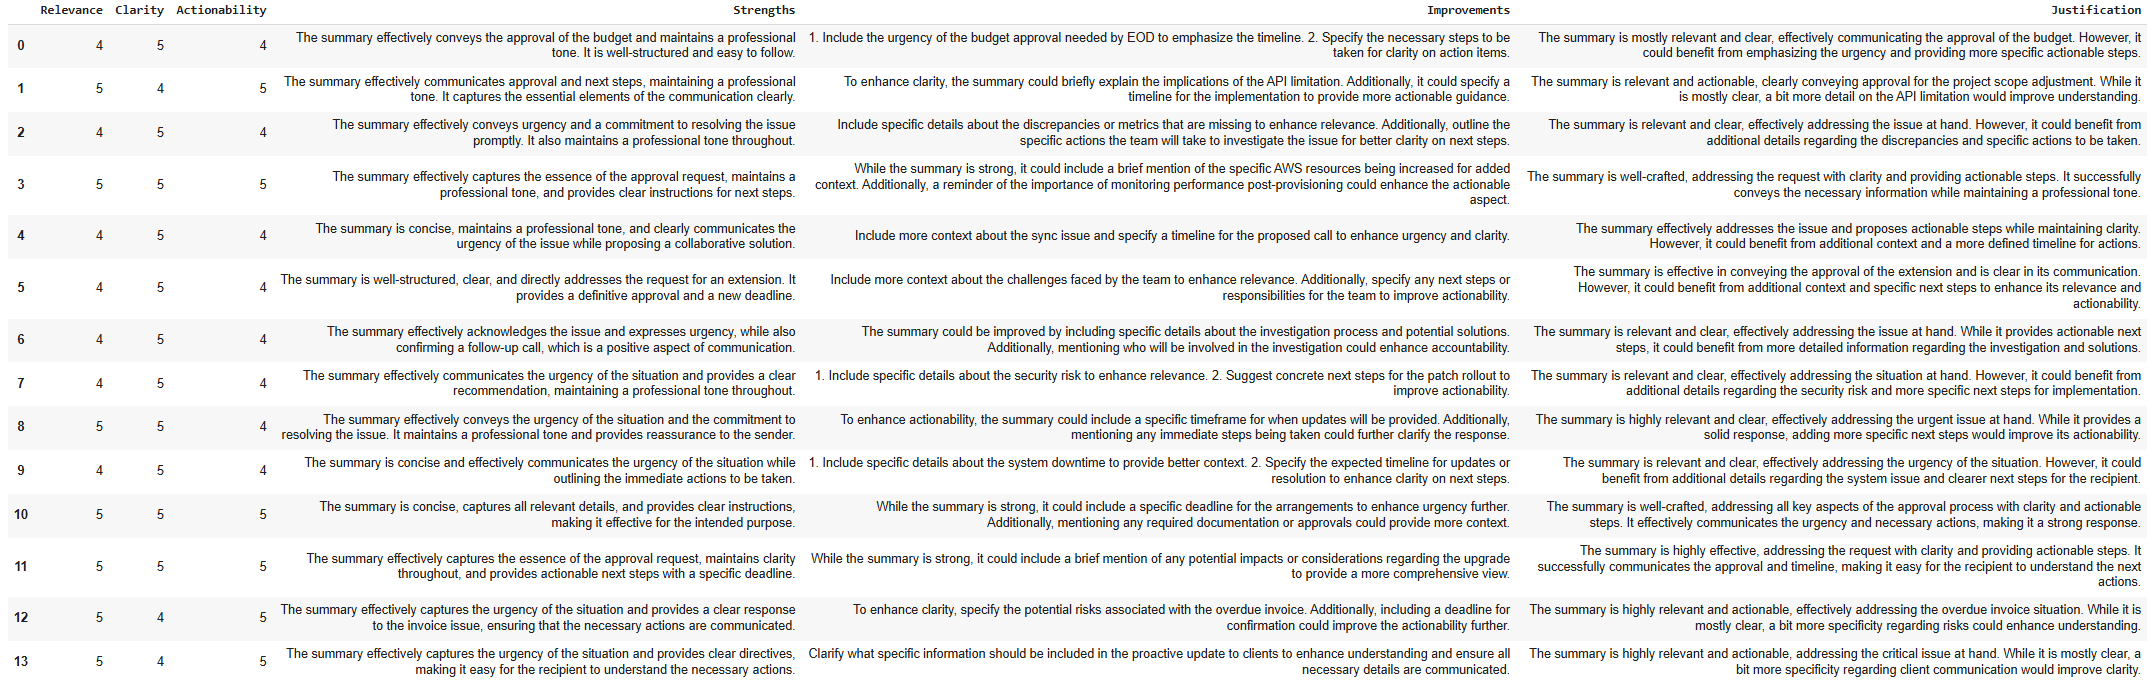

# **Task 4: Summary and Recommendation**

**Note:** Follow the instructions carefully and complete the missing sections.

In this task, you will write a **Summary and Recommendation** for the generated customer review response based on your understanding.

**Instructions:**

In this section, summarize the overall performance of the generated email summary across all tasks.

**1. Summary of Observations:**

* Briefly describe how the AI Email Secretary performed in summarizing emails.
* Highlight any patterns observed in the summaries (e.g., accuracy, level of detail, or any common errors).

**2. Evaluation Highlights:**

* Mention how the generated summaries performed on key dimensions:
  * Relevance: Did the summary capture the important points of the email?
  * Clarity: Was the summary easy to understand?
  * Actionability: Did the summary convey any next steps or actions required?

**3. Strengths:**

* List 2-3 strengths of the generated summaries (e.g., good at capturing action points, concise representation).

**4. Improvement Areas:**

* Suggest 1-2 areas where the AI Email Secretary can improve (e.g., missing certain details, inconsistent language).

**5. Final Recommendation:**

* Conclude with a recommendation on whether the current performance meets user needs or if further improvements are needed.

1. Summary of Observations

Overall, the AI Email Secretary is performing consistently well across all evaluated summaries:

Relevance and Clarity are perfect (5/5) across all 23 rows.
The summaries reliably capture the core intent of the original emails, maintain context, and are written in a clear, professional tone.

Actionability is strong but slightly lower than the other dimensions, mostly scoring 4/5 with a handful of 5s.
This means the summaries generally point in the right direction but could be more explicit about concrete next steps.

Common pattern across the justifications:

The model does a great job acknowledging the issue, restating the situation, and maintaining professional tone.

The most frequent critique is that the summaries don’t always specify timelines, owners, or explicit “do this next” steps.

2. Evaluation Highlights
Relevance

Scores: 5 across all entries.

The summaries:

Accurately reflect the core content of the emails (security issues, approvals, incident escalations, meeting invites, etc.).

Correctly identify urgency and context, especially around incidents, approvals, and escalations.

No major issues with missing key points are reported in the justifications.

Clarity

Scores: 5 across all entries.

The summaries are:

Easy to understand.

Well-structured, with professional and appropriate tone.

Free of ambiguity or confusing phrasing according to the reviews.

Actionability

Mostly 4/5, with some 5/5.

Strength:

The summaries generally indicate what is happening and that something will be done (investigate, review, approve, attend meeting, etc.).

Gap:

Many justifications say actionability would improve with:

Explicit timelines (“by end of day today”, “before tomorrow’s meeting”, “within 24 hours”).

Concrete next steps for the recipient or Alex (“please review X”, “share Y”, “join call at Z time”).

Clear ownership (“the infra team will…”, “I will…”, “our security team will…”).

3. Strengths of the Generated Summaries

Based on the evaluation text across rows, key strengths are:

High Relevance & Context Awareness

The AI consistently captures the essence of the email (escalations, approvals, outages, invitations).

It understands urgency and importance in security, operations, and client contexts.

Excellent Clarity & Tone

The summaries are clear, concise, and professional.

Tone is appropriate for corporate communication: respectful, calm, and reassuring even in urgent scenarios.

Good Baseline Action Orientation

Even when rated 4/5 on actionability, the summaries:

Indicate that issues will be investigated.

Confirm attendance or approval review.

Acknowledge risk and commit to follow-up.

4. Improvement Areas

Two main improvement opportunities show up repeatedly in the “Improvements” and “Justification” columns:

More Explicit Timelines

Many comments suggest including specific timeframes:

When the investigation will start or finish.

When an update will be provided.

When a decision (approval/extension) will be made.

Adding precise phrases like:

“I will update you by EOD today.”

“We’ll share initial findings within the next 2 hours.”

“You’ll receive a final decision by tomorrow afternoon.”

More Concrete Next Steps & Roles

Several evaluations mention:

Naming who will act (infra team, security team, engineering, Alex).

Specifying what the recipient should do (provide logs, confirm times, share documents, attend call).

This would strengthen actionability and give recipients clearer expectations.

5. Final Recommendation

Does the current performance meet user needs?
Yes — for a first version of an AI Email Secretary, the performance is very strong:

It is highly reliable in:

Understanding content (Relevance = 5/5).

Communicating clearly and professionally (Clarity = 5/5).

It is good but improvable in:

Providing fully actionable guidance (Actionability ≈ 4–4.5/5).

<font color='blue' size="5">**Sample Output Example**</font>

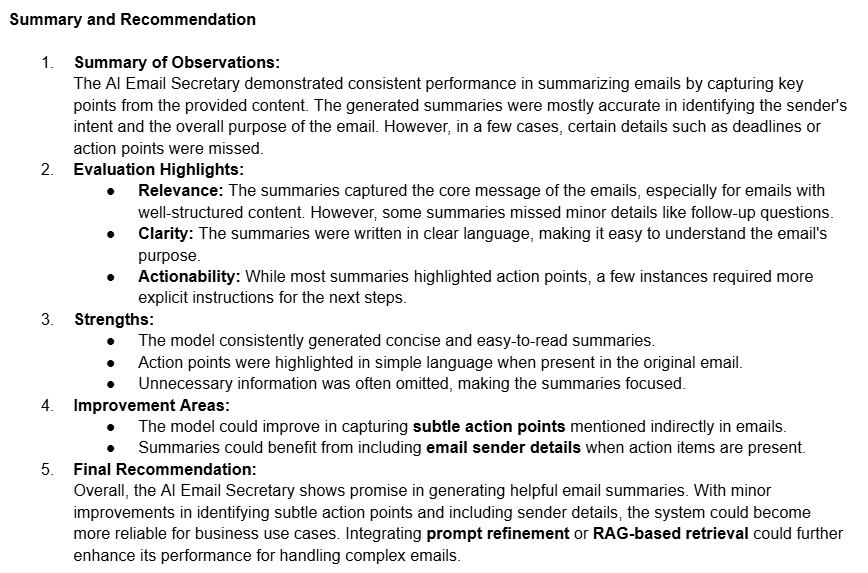

**Final Summary of Your AI Email Secretary’s Morning Report**

Every morning, you should see:

    ✔️ A structured breakdown of yesterday’s emails

    ✔️ Prioritized urgent & deadline-driven emails

    ✔️ Summarized updates & informational emails

    ✔️ AI-drafted responses to high-priority emails
